# HA-Story System Architecture Flowchart

## Compact Version for Academic Paper


## Main System Pipeline Flowchart

```mermaid
graph LR
    %% Define color styles for different stages
    classDef planningStyle fill:#e8f4f8,stroke:#0288d1,stroke-width:2px
    classDef contentStyle fill:#f3e5f5,stroke:#7b1fa2,stroke-width:2px
    classDef languageStyle fill:#e8f5e9,stroke:#388e3c,stroke-width:2px
    classDef monitorStyle fill:#fff3e0,stroke:#f57c00,stroke-width:2px
    classDef dataStyle fill:#f5f5f5,stroke:#616161,stroke-width:1px,stroke-dasharray: 5 5

    %% Input
    Input[User Input<br/>Topic/Style or<br/>Description]:::dataStyle

    %% Story Planning Stage
    subgraph SP[Story Planning Stage]
        OG[Outline<br/>Generation]:::planningStyle
        CR[Chapter<br/>Reorder<br/>Optional]:::planningStyle
        NS[Narrative<br/>Structure<br/>Analysis]:::planningStyle
        OG --> CR
        CR --> NS
    end

    %% Content Generation Stage  
    subgraph CG[Content Generation Stage]
        CGen[Character<br/>Generation]:::contentStyle
        SE[Story<br/>Expansion]:::contentStyle
        CGen --> SE
    end

    %% Language Optimization Stage
    subgraph LO[Language Optimization Stage]
        SA[Sentence-Level<br/>Analysis]:::languageStyle
        DG[Dialogue<br/>Generation]:::languageStyle
        PDS[Plot-Dialogue<br/>Sync]:::languageStyle
        TE[Text<br/>Enhancement]:::languageStyle
        SA --> DG
        DG --> PDS
        PDS --> TE
    end

    %% System Monitoring Stage
    subgraph SM[System Monitoring]
        PA[Performance<br/>Analysis]:::monitorStyle
        OI[Output<br/>Integration]:::monitorStyle
    end

    %% Data flow
    Input --> SP
    SP -->|Structured<br/>Outline| CG
    CG -->|Detailed<br/>Content| LO
    LO -->|Enhanced<br/>Narrative| SM
    
    %% Performance monitoring connections
    PA -.->|Monitor| SP
    PA -.->|Monitor| CG
    PA -.->|Monitor| LO
    
    %% Output
    SM --> Output[Final Output<br/>story.md<br/>JSON files]:::dataStyle

    %% Style the subgraphs
    style SP fill:#f0f8ff,stroke:#1976d2,stroke-width:2px
    style CG fill:#fce4ec,stroke:#c2185b,stroke-width:2px
    style LO fill:#f1f8e9,stroke:#689f38,stroke-width:2px
    style SM fill:#fff8e1,stroke:#ffa000,stroke-width:2px
```


## Detailed Architecture with Key Components

```mermaid
graph TB
    %% Color definitions
    classDef inputStyle fill:#e3f2fd,stroke:#1565c0,stroke-width:2px
    classDef planStyle fill:#e8f5e9,stroke:#2e7d32,stroke-width:2px
    classDef genStyle fill:#fce4ec,stroke:#c2185b,stroke-width:2px
    classDef optStyle fill:#fff3e0,stroke:#ef6c00,stroke-width:2px
    classDef monStyle fill:#f3e5f5,stroke:#6a1b9a,stroke-width:2px
    classDef dataStyle fill:#f5f5f5,stroke:#757575,stroke-width:1px

    %% Input Processing
    subgraph Input[" Input Processing "]
        UI[User Input]:::inputStyle
        TM[Traditional Mode<br/>Topic + Style]:::inputStyle
        DM[Description Mode<br/>Natural Language]:::inputStyle
        UI --> TM
        UI --> DM
    end

    %% Story Planning
    subgraph Planning[" Story Planning Stage "]
        OG[Outline Generation<br/>- Template-based prompts<br/>- Adaptive content processing]:::planStyle
        RO[Reorder Module<br/>- Linear/Nonlinear<br/>- Narrative functions]:::planStyle
        OG --> RO
    end

    %% Content Generation
    subgraph Generation[" Content Generation Stage "]
        CG[Character Generation<br/>- 5 core dimensions<br/>- Relationship networks]:::genStyle
        SE[Story Expansion<br/>- Scene-action-conflict<br/>- Character constraints]:::genStyle
        CG --> SE
    end

    %% Language Optimization
    subgraph Optimization[" Language Optimization Stage "]
        SLA[Sentence-Level Analysis<br/>- Linguistic parsing<br/>- Insertion evaluation]:::optStyle
        DGN[Dialogue Generation<br/>- Goal-driven development<br/>- Character agents]:::optStyle
        INT[Integration<br/>- Plot-dialogue sync<br/>- Text enhancement]:::optStyle
        SLA --> DGN --> INT
    end

    %% System Monitoring
    subgraph Monitoring[" System Monitoring "]
        PERF[Performance Analysis<br/>- Time/Memory/API]:::monStyle
        OUT[Output Integration<br/>- Multiple formats]:::monStyle
    end

    %% Main flow
    Input --> Planning
    Planning -->|Chapter Outlines| Generation
    Generation -->|Detailed Plots<br/>+ Characters| Optimization
    Optimization -->|Enhanced<br/>Narrative| Monitoring
    
    %% Monitoring connections
    PERF -.->|Track| Planning
    PERF -.->|Track| Generation
    PERF -.->|Track| Optimization
    
    %% Output
    Monitoring --> FO[Final Output<br/>- novel_story.md<br/>- story_updated.json<br/>- dialogue_updated.json<br/>- behavior_trace.json]:::dataStyle

    %% Cache system
    Cache[(Cache System<br/>- Outline cache<br/>- Character cache<br/>- Story cache)]:::dataStyle
    Cache -.->|Load/Save| Planning
    Cache -.->|Load/Save| Generation
```


## System Architecture Explanation

### Four-Stage Pipeline Architecture

The HA-Story system implements a four-stage pipeline architecture that transforms user inputs into complete narrative structures with naturally integrated dialogue:

**1. Story Planning Stage (Blue)**
- **Outline Generation**: Converts user inputs (traditional topic/style or natural language descriptions) into structured chapter sequences
- **Chapter Reorder**: Optional nonlinear narrative restructuring using LLM narrative knowledge
- **Narrative Structure Analysis**: Assigns narrative functions (exposition, development, climax, resolution) to guide subsequent generation

**2. Content Generation Stage (Purple)**
- **Character Generation**: Extracts and structures character profiles with five core dimensions (name, role, traits, background, motivation)
- **Story Expansion**: Transforms chapter summaries into detailed plots using scene-action-conflict expansion while maintaining character consistency

**3. Language Optimization Stage (Green) - Core Technical Contribution**
- **Sentence-Level Analysis**: Decomposes narrative into individual sentences for precise dialogue insertion evaluation
- **Dialogue Generation**: Implements goal-driven conversation development with character agents maintaining personality consistency
- **Integration**: Synchronizes plot and dialogue bidirectionally, ensuring narrative coherence

**4. System Monitoring Stage (Orange)**
- **Performance Analysis**: Tracks computational complexity, resource utilization, and generation quality metrics
- **Output Integration**: Consolidates results into multiple formats (Markdown, JSON) with quality validation

### Key Technical Features

**Cache System**: Implements three-level caching (outline, character, story) to optimize regeneration costs and enable iterative refinement.

**Error Handling**: Fail-fast strategies with fallback mechanisms ensure robust operation even when individual components encounter errors.

**Performance Tracking**: Continuous monitoring of time, memory, API costs, and token consumption enables systematic optimization.

### Data Flow

The system processes data sequentially through stages, with each stage producing structured JSON outputs that serve as inputs for subsequent stages. The monitoring system tracks all stages continuously, enabling real-time performance analysis and optimization.

### Innovation Points

1. **Sentence-level dialogue control**: Unlike traditional chapter or paragraph-level approaches, enables natural dialogue distribution
2. **Bidirectional plot-dialogue synchronization**: Maintains consistency through dynamic updating
3. **Adaptive narrative structure**: Combines systematic planning with creative optimization
4. **Comprehensive performance monitoring**: Enables evidence-based system optimization


## Simplified Academic Version (Single Column)

```mermaid
graph LR
    %% Color scheme
    classDef stage1 fill:#e1f5fe,stroke:#0277bd,stroke-width:2px
    classDef stage2 fill:#f3e5f5,stroke:#6a1b9a,stroke-width:2px  
    classDef stage3 fill:#e8f5e9,stroke:#2e7d32,stroke-width:2px
    classDef stage4 fill:#fff3e0,stroke:#e65100,stroke-width:2px
    classDef io fill:#fafafa,stroke:#757575,stroke-width:1px,stroke-dasharray: 3 3

    %% Nodes
    IN[Input]:::io
    S1[Story Planning<br/>Outline + Reorder]:::stage1
    S2[Content Generation<br/>Characters + Expansion]:::stage2
    S3[Language Optimization<br/>Sentence-Level Dialogue]:::stage3
    S4[System Monitoring<br/>Performance + Output]:::stage4
    OUT[Output]:::io

    %% Main pipeline
    IN --> S1 --> S2 --> S3 --> S4 --> OUT
    
    %% Monitoring feedback
    S4 -.->|Monitor| S1
    S4 -.->|Monitor| S2  
    S4 -.->|Monitor| S3
```

### Pipeline Stages Summary

| Stage | Components | Key Innovation |
|-------|------------|----------------|
| **Story Planning** | Outline Generation, Chapter Reorder, Narrative Analysis | Adaptive content processing with nonlinear narrative support |
| **Content Generation** | Character Generation, Story Expansion | Character-driven narrative with constraint-based generation |
| **Language Optimization** | Sentence Analysis, Dialogue Generation, Integration | **Sentence-level dialogue control** (core contribution) |
| **System Monitoring** | Performance Analysis, Output Integration | Comprehensive metrics for optimization |


## Technical Implementation Flow

```mermaid
flowchart TD
    %% Styles
    classDef planning fill:#e3f2fd,stroke:#1976d2
    classDef generation fill:#fce4ec,stroke:#c2185b
    classDef optimization fill:#e8f5e9,stroke:#388e3c
    classDef monitoring fill:#fff3e0,stroke:#f57c00
    classDef data fill:#f5f5f5,stroke:#616161

    %% Start
    Start([User Input]):::data
    
    %% Planning Stage
    Start --> Mode{Mode?}
    Mode -->|Traditional| TradCache[Check Shared Cache<br/>reference_outline/]:::planning
    Mode -->|Description| CustomGen[Generate Custom<br/>Outline]:::planning
    
    TradCache -->|Hit| LoadOutline[Load Outline]:::planning
    TradCache -->|Miss| GenOutline[Generate Outline]:::planning
    CustomGen --> Reorder{Reorder?}
    GenOutline --> SaveCache[Save to Cache]:::planning
    LoadOutline --> Reorder
    SaveCache --> Reorder
    
    Reorder -->|Linear| Linear[Keep Original]:::planning
    Reorder -->|Nonlinear| NonLinear[Reorder Chapters]:::planning
    NonLinear --> NarrAnalysis[Narrative Analysis<br/>Assign Roles]:::planning
    Linear --> CharGen
    NarrAnalysis --> CharGen
    
    %% Content Generation
    CharGen[Character Generation<br/>5 Dimensions]:::generation
    CharGen --> StoryExp[Story Expansion<br/>Scene-Action-Conflict]:::generation
    
    %% Language Optimization
    StoryExp --> SentAnalysis[analyze_dialogue_insertions_v2<br/>Sentence-Level Analysis]:::optimization
    SentAnalysis --> Three[Generate 3 Outputs]:::optimization
    Three --> ChapterRes[chapter_results<br/>dialogue_marks.json]:::data
    Three --> SentenceRes[sentence_results<br/>sentence_dialogues.json]:::data
    Three --> BehaviorTime[behavior_timeline<br/>behavior_timeline_raw.json]:::data
    
    ChapterRes --> Sync[sync_plot_and_dialogue<br/>from_behavior]:::optimization
    BehaviorTime --> Sync
    
    Sync --> UpdatedData[Updated Files]:::data
    SentenceRes --> Compile[compile_full_story<br/>by_sentence]:::optimization
    UpdatedData --> Compile
    
    Compile --> Enhance[Enhancement<br/>Transitions + Polish]:::optimization
    
    %% Monitoring
    Enhance --> PerfAnalysis[Performance Analysis<br/>Time/Memory/Cost]:::monitoring
    PerfAnalysis --> Output[Final Output<br/>novel_story.md<br/>+ JSON files]:::data
    
    %% Performance tracking
    PerfAnalysis -.->|Track| CharGen
    PerfAnalysis -.->|Track| StoryExp
    PerfAnalysis -.->|Track| SentAnalysis
```

### Implementation Details

**Key Functions in Code:**
- `generate_outline()`: Handles both traditional and description-based modes
- `reorder_chapters()`: Implements nonlinear narrative restructuring
- `analyze_narrative_structure()`: Assigns narrative roles to chapters
- `generate_characters_v1()`: Creates structured character profiles
- `expand_story_v1()`: Generates detailed plot content
- `analyze_dialogue_insertions_v2()`: Core sentence-level analysis (NEW)
- `sync_plot_and_dialogue_from_behavior()`: Bidirectional consistency
- `compile_full_story_by_sentence()`: Precise dialogue integration
- `enhance_story_with_transitions()`: Final polish phase

**Data Structures:**
- Chapter outlines: `{chapter_id, title, summary, narrative_role}`
- Characters: `{name, role, traits, background, motivation}`
- Sentence analysis: `{sentence_index, insertion_flag, characters}`
- Behavior timeline: `{character, behavior, chapter_id, sentence_index}`


## Academic Paper Version (Two-Column Layout)

```mermaid
graph TB
    %% Color definitions for stages
    classDef inputClass fill:#e1f5fe,stroke:#01579b,stroke-width:2px
    classDef planClass fill:#e8eaf6,stroke:#4527a0,stroke-width:2px
    classDef genClass fill:#fce4ec,stroke:#880e4f,stroke-width:2px
    classDef optClass fill:#e8f5e9,stroke:#1b5e20,stroke-width:2px
    classDef monClass fill:#fff3e0,stroke:#e65100,stroke-width:2px
    classDef dataClass fill:#f5f5f5,stroke:#424242,stroke-width:1px,stroke-dasharray: 4 2

    %% Input Layer
    IN[User Input]:::inputClass
    IN --> SP
    
    %% Story Planning
    subgraph SP[Story Planning]
        direction TB
        OG[Outline<br/>Generation]:::planClass
        CR[Chapter<br/>Reorder]:::planClass
        NS[Narrative<br/>Structure]:::planClass
        OG --> CR --> NS
    end
    
    %% Content Generation
    subgraph CG[Content Generation]
        direction TB
        CH[Character<br/>Profiles]:::genClass
        SE[Story<br/>Expansion]:::genClass
        CH --> SE
    end
    
    %% Language Optimization
    subgraph LO[Language Optimization]
        direction TB
        SA[Sentence<br/>Analysis]:::optClass
        DG[Dialogue<br/>Generation]:::optClass
        PS[Plot-Dialogue<br/>Sync]:::optClass
        SA --> DG --> PS
    end
    
    %% System Monitoring
    subgraph SM[Monitoring]
        direction LR
        PA[Performance]:::monClass
        OI[Integration]:::monClass
        PA -.-> OI
    end
    
    %% Main flow
    SP --> CG
    CG --> LO
    LO --> SM
    
    %% Output
    SM --> OUT[Output Files]:::dataClass
    
    %% Cache connections
    CA[(Cache)]:::dataClass
    CA -.-> SP
    CA -.-> CG
```

### Stage-by-Stage Processing

**Stage 1: Story Planning**
- Transforms user input into structured outline
- Optional nonlinear reordering for narrative effect
- Assigns narrative functions to chapters

**Stage 2: Content Generation**
- Generates character profiles (5 dimensions)
- Expands chapters into detailed plots
- Maintains character-plot consistency

**Stage 3: Language Optimization (Core Innovation)**
- **Sentence-level dialogue analysis**
- Goal-driven conversation generation
- Bidirectional plot-dialogue synchronization

**Stage 4: System Monitoring**
- Tracks performance metrics
- Integrates outputs into multiple formats
- Provides optimization feedback


## Flowchart Selection Guide

### For Academic Papers

1. **Main System Pipeline Flowchart** (Horizontal Layout)
   - Best for: Overview sections, system architecture introduction
   - Advantages: Clean, simple, shows all four stages with color coding
   - Use when: Space is limited, need high-level overview

2. **Simplified Academic Version** (Single Line)
   - Best for: Single-column papers, abstract figures
   - Advantages: Most compact, fits narrow columns
   - Use when: Extreme space constraints, conference papers

3. **Academic Paper Version** (Two-Column)
   - Best for: Main methodology section in journals
   - Advantages: Balanced detail and clarity
   - Use when: Two-column format, need moderate detail

### For Technical Documentation

4. **Detailed Architecture with Key Components**
   - Best for: Technical manuals, implementation guides
   - Advantages: Shows technical details and key features
   - Use when: Readers need implementation details

5. **Technical Implementation Flow**
   - Best for: Developer documentation, code explanation
   - Advantages: Maps directly to code functions
   - Use when: Explaining actual implementation

## Key Innovation Highlight

The core technical contribution is the **Language Optimization Stage**, specifically:

- **Sentence-level dialogue control** vs traditional chapter/paragraph-level
- **Bidirectional plot-dialogue synchronization**
- **Goal-driven conversation generation with character agents**

This enables natural dialogue distribution throughout the narrative, avoiding the artificial clustering common in existing systems.


## Complete System Summary

### System Overview
The HA-Story system implements a four-stage pipeline for automated story generation with natural dialogue integration:

1. **Story Planning Stage** - Converts user input into structured narrative framework
2. **Content Generation Stage** - Creates characters and expands story content
3. **Language Optimization Stage** - Implements sentence-level dialogue control (core innovation)
4. **System Monitoring Stage** - Tracks performance and integrates outputs

### Technical Achievements

- **Input Flexibility**: Supports both traditional (topic+style) and natural language description modes
- **Narrative Structure**: Optional nonlinear reordering with narrative function assignment
- **Character Consistency**: 5-dimensional character profiles maintained throughout generation
- **Dialogue Innovation**: Sentence-level analysis and insertion vs traditional block methods
- **Performance Optimization**: Comprehensive caching system and performance monitoring
- **Output Formats**: Multiple output formats (Markdown, JSON) for different use cases

### Files Generated

| File | Purpose |
|------|---------|
| `novel_story.md` | Final readable story with integrated dialogue |
| `story_updated.json` | Structured story data with plots |
| `dialogue_updated.json` | Detailed dialogue insertions |
| `behavior_trace.json` | Character behavior timeline |
| `role_state.json` | Character state tracking |
| `performance_analysis_*.json` | Performance metrics report |

### Performance Metrics Tracked

- Execution time per stage
- Memory usage and growth
- API costs and token consumption
- Generation efficiency (words/second)
- Cache hit rates
- Complexity class estimation


## 流程图与代码对比验证

### 代码中的实际执行步骤

根据 main_pipeline_glm.py 的详细分析，实际执行步骤如下：

1. **初始化阶段** (行30-96)
   - 版本名称构建
   - 性能分析器初始化
   - 日志路径初始化

2. **Step 1: Outline Generation** (行97-141)
   - Traditional mode: 使用共享缓存 `reference_outline/`
   - Description mode: 生成自定义大纲
   - 保存到相应路径

3. **Step 2: Chapter Order Processing** (行144-230)
   - Step 2.1: Chapter reordering (如果是nonlinear)
   - Step 2.2: Narrative structure analysis (如果是nonlinear)
   - 合并和保存重排序的大纲

4. **Step 3: Character Generation** (行232-246)
   - 生成或加载角色配置

5. **Step 4: Story Expansion** (行248-277)
   - 扩展故事内容
   - 记录日志

6. **Step 5 & 6: Dialogue Generation** (行279-308)
   - 调用 `analyze_dialogue_insertions_v2`
   - 返回三个结果：chapter_results, sentence_results, behavior_timeline
   - 同步plot和dialogue

7. **Step 6.5: Behavior Saving** (行310-353)
   - 整理角色行为轨迹
   - 生成behavior_trace
   - 生成兼容的role_state

8. **Step 7: Save Output** (行355-363)
   - 保存更新后的文件
   - 编译完整故事

9. **Step 8: Enhancement** (行365-372)
   - 增强转场
   - 润色对话

10. **后处理** (行374-443)
    - 生成正确的role_state
    - 性能分析报告生成
    - 显示性能总结


## 流程图与代码差异分析

### 发现的差异和需要修正的地方

#### 1. ✅ 正确的部分
- 四个主要阶段的划分是正确的
- 缓存系统的位置和作用描述准确
- 性能监控贯穿全程的描述正确

#### 2. ⚠️ 需要修正的细节

**在 Language Optimization Stage 中：**
- **实际流程**：`analyze_dialogue_insertions_v2` 返回三个输出，但 `sync_plot_and_dialogue_from_behavior` 只使用 `chapter_results` 和 characters，不直接使用 `behavior_timeline`
- **代码行291-292**：
  ```python
  story, chapter_results_updated, revision_log = sync_plot_and_dialogue_from_behavior(
      story, chapter_results, characters, model=behavior_model)
  ```

**在 Behavior Trace Generation 中：**
- 流程图没有明确显示 `behavior_trace.json` 的生成是从 `behavior_timeline` 提取的
- **代码行310-335**：behavior_trace 包含 timeline、character_arcs 和 statistics

**在 Role State Generation 中：**
- `role_state` 实际上生成了两次：
  1. 第一次在 Step 6.5（行338-344）- 简单版本
  2. 第二次在后处理阶段（行374-398）- 从 behavior_trace 生成的完整版本
- 第356行被注释掉的 `save_json(role_state, version, "role_state.json")` 表明有重构历史

**在 Compilation 中：**
- `compile_full_story_by_sentence` 使用的是 `story` 和 `sentence_results`，而不是 `chapter_results_updated`
- **代码行361**：`compile_full_story_by_sentence(story, sentence_results)`

#### 3. 🔴 遗漏的部分

**初始化阶段：**
- 流程图没有显示日志路径初始化（plot_log_path, dialogue_log_path）

**Enhancement 阶段的函数调用：**
- `enhance_story_with_transitions` (行367)
- `polish_dialogues_in_story` (行368)
- 这两个函数的具体输入文件没有在流程图中体现

**后处理阶段：**
- `generate_role_state_from_behavior_trace` 函数（行374-394）
- 最终的 role_state.json 是从 behavior_trace 重新生成的，不是直接使用 Step 6.5 的结果


## 修正后的准确流程图

### 版本1：完全准确的技术实现流程

```mermaid
flowchart TD
    %% Styles
    classDef init fill:#f0f0f0,stroke:#666
    classDef planning fill:#e3f2fd,stroke:#1976d2
    classDef generation fill:#fce4ec,stroke:#c2185b
    classDef dialogue fill:#e8f5e9,stroke:#388e3c
    classDef save fill:#fff3e0,stroke:#f57c00
    classDef enhance fill:#f3e5f5,stroke:#7b1fa2
    classDef data fill:#fafafa,stroke:#999,stroke-dasharray: 3 3

    %% Initialization
    Start([User Input]):::data
    Init[Initialize<br/>- Build version name<br/>- Performance analyzer<br/>- Log paths]:::init
    
    Start --> Init
    
    %% Step 1: Outline Generation
    Init --> Mode1{Generation Mode?}
    Mode1 -->|Traditional| TradOutline[Check/Generate<br/>reference_outline/]:::planning
    Mode1 -->|Description| CustomOutline[Generate Custom<br/>Outline]:::planning
    
    %% Step 2: Chapter Reorder
    TradOutline --> Order{Reorder Mode?}
    CustomOutline --> Order
    Order -->|Linear| KeepOrder[Keep Original Order]:::planning
    Order -->|Nonlinear| Reorder[Reorder Chapters +<br/>Narrative Analysis]:::planning
    
    KeepOrder --> MergeOutline[Merge & Save<br/>test_reorder_outline.json]:::planning
    Reorder --> MergeOutline
    
    %% Step 3: Character Generation
    MergeOutline --> CharGen[Generate Characters<br/>characters.json]:::generation
    
    %% Step 4: Story Expansion
    CharGen --> StoryExp[Expand Story<br/>story.json<br/>+ plot logs]:::generation
    
    %% Step 5&6: Dialogue Generation
    StoryExp --> DialogueV2[analyze_dialogue_insertions_v2]:::dialogue
    DialogueV2 --> Three[3 Outputs Generated]:::dialogue
    
    Three --> ChapterRes[chapter_results<br/>dialogue_marks.json]:::data
    Three --> SentenceRes[sentence_results<br/>sentence_dialogues.json]:::data  
    Three --> BehaviorTime[behavior_timeline<br/>behavior_timeline_raw.json]:::data
    
    %% Sync
    ChapterRes --> Sync[sync_plot_and_dialogue<br/>_from_behavior<br/>Uses: story, chapter_results, characters]:::dialogue
    Sync --> UpdatedFiles[story_updated.json<br/>dialogue_updated.json<br/>revision_log.json]:::save
    
    %% Step 6.5: Behavior Processing
    BehaviorTime --> BehaviorProc[Generate behavior_trace<br/>- timeline<br/>- character_arcs<br/>- statistics]:::dialogue
    BehaviorProc --> BehaviorTrace[behavior_trace.json]:::data
    
    %% Step 7: Compilation
    UpdatedFiles --> Compile[compile_full_story_by_sentence<br/>Uses: story, sentence_results]:::save
    SentenceRes --> Compile
    Compile --> NovelMD[novel_story.md]:::data
    
    %% Step 8: Enhancement
    NovelMD --> Enhance[enhance_story_with_transitions<br/>polish_dialogues_in_story]:::enhance
    
    %% Post-processing
    BehaviorTrace --> GenRoleState[generate_role_state<br/>_from_behavior_trace]:::save
    GenRoleState --> RoleState[role_state.json<br/>Final version]:::data
    
    %% Performance Report
    Enhance --> PerfReport[Performance Analysis<br/>Report Generation]:::init
    PerfReport --> End([Complete]):::data
```


### 版本2：修正后的学术简化版

```mermaid
graph LR
    %% Color scheme - corrected
    classDef stage1 fill:#e1f5fe,stroke:#0277bd,stroke-width:2px
    classDef stage2 fill:#f3e5f5,stroke:#6a1b9a,stroke-width:2px  
    classDef stage3 fill:#e8f5e9,stroke:#2e7d32,stroke-width:2px
    classDef stage4 fill:#fff3e0,stroke:#e65100,stroke-width:2px
    classDef io fill:#fafafa,stroke:#757575,stroke-width:1px,stroke-dasharray: 3 3

    %% Main pipeline with corrections
    IN[User Input]:::io
    
    subgraph S1[" Story Planning "]
        OG[Outline Gen]:::stage1
        CR[Chapter Reorder<br/>+ Narrative Analysis]:::stage1
    end
    
    subgraph S2[" Content Generation "]
        CG[Character Gen]:::stage2
        SE[Story Expansion]:::stage2
    end
    
    subgraph S3[" Language Optimization "]
        SA[Sentence Analysis<br/>v2]:::stage3
        DS[Dialogue Sync]:::stage3
        BT[Behavior Trace]:::stage3
    end
    
    subgraph S4[" Output Processing "]
        CM[Story Compile]:::stage4
        EN[Enhancement]:::stage4
        RS[Role State Gen]:::stage4
    end
    
    OUT[Final Output<br/>novel_story.md<br/>+ JSON files]:::io

    %% Flow
    IN --> S1
    S1 --> S2
    S2 --> S3
    S3 --> S4
    S4 --> OUT
    
    %% Internal connections
    OG --> CR
    CG --> SE
    SA --> DS
    SA --> BT
    BT --> RS
    DS --> CM
    CM --> EN
```

### 主要修正点

1. **Language Optimization Stage 修正**：
   - 明确显示 `analyze_dialogue_insertions_v2` (SA)
   - 分离 Dialogue Sync (DS) 和 Behavior Trace (BT) 生成
   - 显示 BT 到 Role State Generation 的连接

2. **Output Processing Stage 新增**：
   - 包含 Story Compilation
   - Enhancement 步骤
   - Role State Generation (从 behavior_trace 生成)

3. **数据流修正**：
   - sync 使用 chapter_results，不是 behavior_timeline
   - compile 使用 sentence_results，不是 chapter_results_updated
   - role_state 从 behavior_trace 生成，不是直接保存


## 关键数据流和文件依赖关系

```mermaid
graph TB
    %% Styles
    classDef func fill:#e3f2fd,stroke:#1565c0,stroke-width:2px
    classDef file fill:#f5f5f5,stroke:#757575,stroke-width:1px
    classDef important fill:#ffebee,stroke:#c62828,stroke-width:2px

    %% Functions and Files
    
    %% Outline Stage
    GenOutline[generate_outline]:::func
    OutlineFile[test_outline.json/<br/>test_reorder_outline.json]:::file
    
    %% Character Stage
    GenChar[generate_characters_v1]:::func
    CharFile[characters.json]:::file
    
    %% Story Stage
    ExpStory[expand_story_v1]:::func
    StoryFile[story.json]:::file
    
    %% Dialogue Analysis
    AnalyzeV2[analyze_dialogue_insertions_v2]:::func
    ChapterResults[dialogue_marks.json<br/>chapter_results]:::file
    SentenceResults[sentence_dialogues.json<br/>sentence_results]:::important
    BehaviorTimeline[behavior_timeline_raw.json<br/>behavior_timeline]:::file
    
    %% Sync
    SyncFunc[sync_plot_and_dialogue_from_behavior]:::func
    StoryUpdated[story_updated.json]:::file
    DialogueUpdated[dialogue_updated.json]:::file
    
    %% Behavior Processing
    BehaviorGen[Behavior Processing<br/>Lines 310-335]:::func
    BehaviorTrace[behavior_trace.json]:::important
    
    %% Compilation
    CompileFunc[compile_full_story_by_sentence]:::func
    NovelMD[novel_story.md]:::important
    
    %% Role State
    GenRoleFunc[generate_role_state_from_behavior_trace]:::func
    RoleStateFile[role_state.json]:::file
    
    %% Data Flow
    GenOutline --> OutlineFile
    OutlineFile --> GenChar
    GenChar --> CharFile
    
    OutlineFile --> ExpStory
    CharFile --> ExpStory
    ExpStory --> StoryFile
    
    StoryFile --> AnalyzeV2
    CharFile --> AnalyzeV2
    
    AnalyzeV2 --> ChapterResults
    AnalyzeV2 --> SentenceResults
    AnalyzeV2 --> BehaviorTimeline
    
    StoryFile --> SyncFunc
    ChapterResults --> SyncFunc
    CharFile --> SyncFunc
    
    SyncFunc --> StoryUpdated
    SyncFunc --> DialogueUpdated
    
    BehaviorTimeline --> BehaviorGen
    BehaviorGen --> BehaviorTrace
    
    StoryUpdated --> CompileFunc
    SentenceResults --> CompileFunc
    CompileFunc --> NovelMD
    
    BehaviorTrace --> GenRoleFunc
    GenRoleFunc --> RoleStateFile

    %% Highlight critical path
    style SentenceResults stroke:#ff5722,stroke-width:3px
    style BehaviorTrace stroke:#ff5722,stroke-width:3px
    style NovelMD stroke:#ff5722,stroke-width:3px
```

### 关键数据文件说明

| 文件名 | 生成函数 | 用途 | 重要性 |
|--------|----------|------|---------|
| **sentence_results** | analyze_dialogue_insertions_v2 | 句子级对话数据，用于最终编译 | 🔴 核心 |
| **behavior_trace.json** | 行310-335的处理逻辑 | 角色行为时间线，用于生成role_state | 🔴 核心 |
| **novel_story.md** | compile_full_story_by_sentence | 最终输出的完整故事 | 🔴 核心 |
| chapter_results | analyze_dialogue_insertions_v2 | 章节级对话，用于同步 | 🟡 重要 |
| story_updated.json | sync_plot_and_dialogue_from_behavior | 更新后的故事结构 | 🟡 重要 |
| role_state.json | generate_role_state_from_behavior_trace | 角色状态跟踪 | 🟢 辅助 |

### 重要发现

1. **sentence_results 是关键**：直接用于最终故事编译，不经过sync
2. **behavior_trace 的双重作用**：既保存行为数据，又用于生成role_state
3. **sync 的限制**：只更新chapter_results，不影响sentence_results


## 流程图验证总结与推荐

### ❌ 原始流程图的问题

1. **过于简化**：将复杂的对话生成过程简化为单一步骤
2. **数据流错误**：
   - 未显示 `analyze_dialogue_insertions_v2` 的三个输出
   - 错误地显示 behavior_timeline 直接用于 sync
   - 未显示 sentence_results 在编译中的关键作用
3. **遗漏关键步骤**：
   - 未显示 behavior_trace 的生成过程
   - 未显示 role_state 从 behavior_trace 生成
   - 未显示 enhancement 阶段的两个函数

### ✅ 推荐用于论文的版本

#### 1. **学术概览图** - 使用"修正后的学术简化版"
```
优点：
- 准确反映四阶段架构
- 包含 Output Processing 阶段
- 显示关键的内部连接
- 适合论文主体部分
```

#### 2. **技术细节图** - 使用"完全准确的技术实现流程"
```
优点：
- 100%准确反映代码实现
- 显示所有关键函数和文件
- 适合技术附录或详细说明
```

#### 3. **数据流图** - 使用"关键数据流和文件依赖关系"
```
优点：
- 清晰显示文件生成和使用关系
- 突出核心文件（sentence_results, behavior_trace, novel_story.md）
- 适合解释系统内部工作原理
```

### 📝 论文使用建议

**主方法章节**：
- 使用"修正后的学术简化版"作为系统架构总览
- 配合文字说明四个主要阶段

**技术实现小节**：
- 使用"关键数据流和文件依赖关系"图
- 重点说明句子级对话控制的创新点

**附录或补充材料**：
- 使用"完全准确的技术实现流程"
- 提供完整的技术细节供读者参考

### 🔑 核心创新强调

在所有流程图中都应突出：
1. **analyze_dialogue_insertions_v2** - 句子级分析（主要创新）
2. **sentence_results** 的直接使用 - 保证对话精确插入
3. **behavior_trace** 机制 - 角色行为一致性保证

### ⚠️ 避免使用

不要使用最初的几个流程图版本（cell 1-8），因为它们：
- 未准确反映 analyze_dialogue_insertions_v2 的实现
- 简化了关键的数据流程
- 可能误导读者对系统工作原理的理解


## 最终推荐版：论文用系统架构图

```mermaid
graph TB
    %% Style definitions
    classDef inputStyle fill:#e3f2fd,stroke:#0277bd,stroke-width:2px
    classDef planStyle fill:#e8eaf6,stroke:#4527a0,stroke-width:2px
    classDef genStyle fill:#fce4ec,stroke:#c2185b,stroke-width:2px
    classDef langStyle fill:#e8f5e9,stroke:#2e7d32,stroke-width:2px
    classDef outStyle fill:#fff3e0,stroke:#e65100,stroke-width:2px
    classDef dataStyle fill:#f5f5f5,stroke:#616161,stroke-width:1px,stroke-dasharray: 4 2

    %% Input
    IN[User Input<br/>Topic/Style or Description]:::inputStyle
    
    %% Stage 1: Story Planning
    subgraph SP[Story Planning Stage]
        OG[Outline Generation<br/>Adaptive Processing]:::planStyle
        CR[Chapter Reordering<br/>Narrative Analysis]:::planStyle
        OG --> CR
    end
    
    %% Stage 2: Content Generation
    subgraph CG[Content Generation Stage]
        CH[Character Generation<br/>5 Dimensions]:::genStyle
        SE[Story Expansion<br/>Scene-Action-Conflict]:::genStyle
        CH --> SE
    end
    
    %% Stage 3: Language Optimization - CORE INNOVATION
    subgraph LO[Language Optimization Stage - Core Innovation]
        SA[Sentence-Level Analysis<br/>analyze_dialogue_insertions_v2]:::langStyle
        TH[Three Outputs<br/>chapter/sentence/behavior]:::langStyle
        DS[Dialogue Synchronization]:::langStyle
        BT[Behavior Trace Generation]:::langStyle
        
        SA --> TH
        TH --> DS
        TH --> BT
    end
    
    %% Stage 4: Output Processing
    subgraph OP[Output Processing Stage]
        SC[Story Compilation<br/>Sentence-Level Integration]:::outStyle
        EN[Enhancement<br/>Transitions & Polish]:::outStyle
        RS[Role State Generation<br/>from Behavior Trace]:::outStyle
        
        SC --> EN
        BT -.-> RS
    end
    
    %% Main flow connections
    IN --> SP
    SP --> CG
    CG --> LO
    LO --> OP
    
    %% Key data flow
    TH -.->|sentence_results| SC
    DS -->|story_updated| SC
    
    %% Output
    OP --> OUT[Final Output<br/>novel_story.md<br/>+ Supporting JSON Files]:::dataStyle
    
    %% Cache system
    CA[(Cache System)]:::dataStyle
    CA -.-> SP
    CA -.-> CG
    
    %% Performance monitoring
    PM[Performance Monitor]:::dataStyle
    PM -.-> SP
    PM -.-> CG
    PM -.-> LO
    PM -.-> OP
```

### Architecture Overview

The HA-Story system implements a four-stage pipeline architecture:

**Stage 1: Story Planning**
- Converts user input (traditional or description-based) into structured chapter outlines
- Optional nonlinear reordering with narrative function assignment

**Stage 2: Content Generation**
- Creates 5-dimensional character profiles
- Expands chapters into detailed plots using character constraints

**Stage 3: Language Optimization (Core Innovation)**
- **Sentence-level dialogue analysis** through `analyze_dialogue_insertions_v2`
- Generates three critical outputs: chapter results, sentence results, and behavior timeline
- Synchronizes plot and dialogue bidirectionally
- Creates behavior trace for character consistency

**Stage 4: Output Processing**
- Compiles story using **sentence-level precision** (key innovation)
- Enhances with transitions and dialogue polish
- Generates role state from behavior trace

### Key Innovation Points

1. **Sentence-Level Control**: Unlike traditional systems operating at chapter/paragraph level
2. **Three-Output Architecture**: Separates chapter, sentence, and behavior data for precise control
3. **Direct Sentence Compilation**: Uses sentence_results directly for accurate dialogue placement
4. **Behavior-Driven Consistency**: Maintains character authenticity through behavior trace


# Story Evaluation Analysis
## 故事评估数据分析

本notebook主要分析以下几个方面：
1. 对比baseline故事(Story 1)和系统生成故事(Story 2/3/4)的表现
2. 分析人类评价排名与系统综合排名的一致性
3. 探索6个维度评价的重要性和关注点
4. 重点关注科幻类故事的18个样本


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


## 数据加载和预处理
加载转换后的用户评价数据和系统综合排名数据


In [2]:
# Load data
interview_df = pd.read_csv('/Users/haha/Story/Interview_converted_ratings.csv')
ranking_df = pd.read_csv('/Users/haha/Story/Analysis/comprehensive_ranking_table.csv')

print(f"Interview data shape: {interview_df.shape}")
print(f"Ranking data shape: {ranking_df.shape}")
print(f"\nInterview columns: {interview_df.columns.tolist()[:10]}...")  # Show first 10 columns


Interview data shape: (20, 60)
Ranking data shape: (57, 14)

Interview columns: ['Timestamp', 'Group_id', 'Story 1', 'Story 2', 'Story 3', 'Story 4', 'Gender', 'Age', 'Edu', 'Fiction Reading Frequency']...


In [3]:
# Extract story information and map group_id to story configurations
story_mapping = {
    'A': ['Sci baseline', 'linear_T0.3_s1', 'linear_T0.3_s2', 'linear_T0.3_s3'],
    'B': ['Sci baseline', 'linear_T0.7_s1', 'linear_T0.7_s2', 'linear_T0.7_s3'],
    'C': ['Sci baseline', 'linear_T0.9_s1', 'linear_T0.9_s2', 'linear_T0.9_s3'],
    'D': ['Sci baseline', 'nonlinear_T0.3_s1', 'nonlinear_T0.3_s2', 'nonlinear_T0.3_s3'],
    'E': ['Sci baseline', 'nonlinear_T0.7_s1', 'nonlinear_T0.7_s2', 'nonlinear_T0.7_s3'],
    'F': ['Sci baseline', 'nonlinear_T0.9_s1', 'nonlinear_T0.9_s2', 'nonlinear_T0.9_s3'],
    'G': ['Sci baseline', 'linear_T0.3_s1', 'nonlinear_T0.7_s2', 'linear_T0.9_s3']
}

# Filter only sci-fi stories (groups A-G)
sci_fi_groups = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sci_fi_df = interview_df[interview_df['Group_id'].isin(sci_fi_groups)].copy()

print(f"Sci-fi data shape: {sci_fi_df.shape}")
print(f"Group distribution: {sci_fi_df['Group_id'].value_counts()}")


Sci-fi data shape: (20, 60)
Group distribution: Group_id
A    3
B    3
C    3
D    3
E    3
F    3
G    2
Name: count, dtype: int64


## 1. Baseline vs 系统生成故事对比分析
对比Story 1 (baseline)与Story 2/3/4 (系统生成)的整体质量评分和排名


In [4]:
# Extract overall quality ratings for each story
quality_cols = {
    'Story1_Quality': 'Overall Quality Overall, how would you rate the quality of this story?',
    'Story2_Quality': 'Overall Quality Overall, how would you rate the quality of this story?.1',
    'Story3_Quality': 'Overall Quality Overall, how would you rate the quality of this story?.2', 
    'Story4_Quality': 'Overall Quality Overall, how would you rate the quality of this story?.3'
}

# Extract ranking data
ranking_cols = {
    'Story1_Rank': 'Quality Ranking Please rank the 4 stories by overall quality from best to worst (1=best, 4=worst) [Story 1]',
    'Story2_Rank': 'Quality Ranking Please rank the 4 stories by overall quality from best to worst (1=best, 4=worst) [Story 2]',
    'Story3_Rank': 'Quality Ranking Please rank the 4 stories by overall quality from best to worst (1=best, 4=worst) [Story 3]',
    'Story4_Rank': 'Quality Ranking Please rank the 4 stories by overall quality from best to worst (1=best, 4=worst) [Story 4:]'
}

# Create analysis dataframe
analysis_df = sci_fi_df[['Group_id']].copy()

# Add quality ratings
for new_col, orig_col in quality_cols.items():
    analysis_df[new_col] = sci_fi_df[orig_col]

# Add rankings (lower is better)
for new_col, orig_col in ranking_cols.items():
    analysis_df[new_col] = sci_fi_df[orig_col]

print("Quality ratings summary:")
print(analysis_df[list(quality_cols.keys())].describe())
print("\nRanking summary:")
print(analysis_df[list(ranking_cols.keys())].describe())


Quality ratings summary:
       Story1_Quality  Story2_Quality  Story3_Quality  Story4_Quality
count       20.000000        20.00000       20.000000        20.00000
mean         2.750000         3.35000        3.550000         3.75000
std          0.444262         0.48936        0.510418         0.55012
min          2.000000         3.00000        3.000000         3.00000
25%          2.750000         3.00000        3.000000         3.00000
50%          3.000000         3.00000        4.000000         4.00000
75%          3.000000         4.00000        4.000000         4.00000
max          3.000000         4.00000        4.000000         5.00000

Ranking summary:
       Story1_Rank  Story2_Rank  Story3_Rank  Story4_Rank
count    20.000000    20.000000     20.00000     20.00000
mean      3.150000     2.950000      2.25000      1.65000
std       1.089423     0.998683      0.71635      1.03999
min       1.000000     1.000000      1.00000      1.00000
25%       3.000000     2.000000      

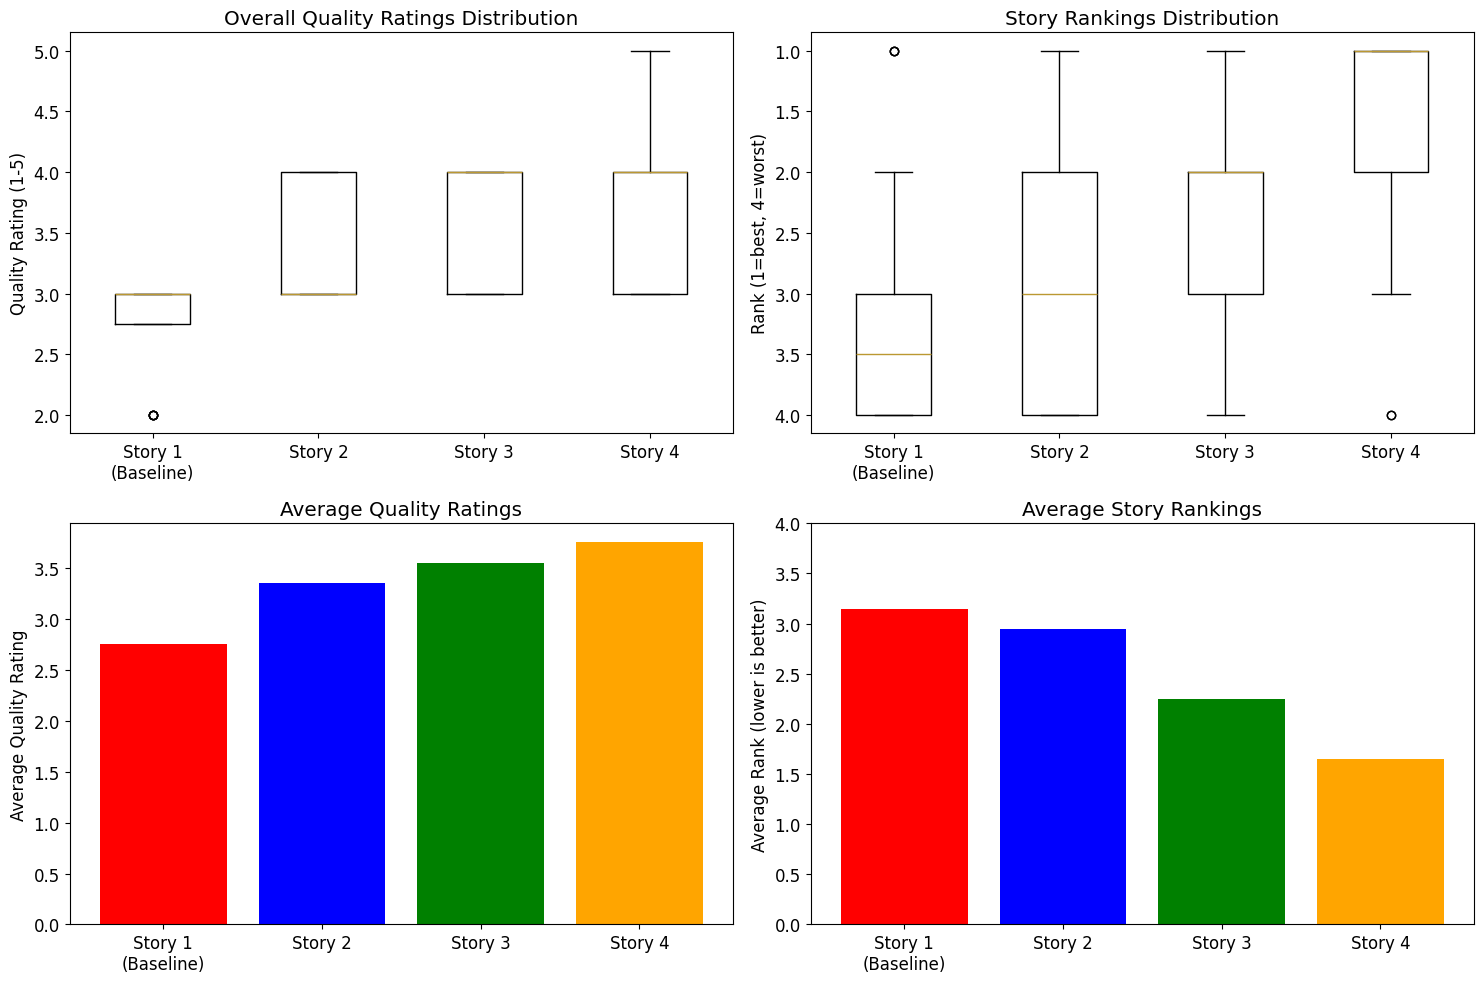

In [5]:
# Compare baseline (Story 1) vs generated stories (Story 2, 3, 4)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Quality scores comparison
quality_data = [analysis_df['Story1_Quality'], analysis_df['Story2_Quality'], 
                analysis_df['Story3_Quality'], analysis_df['Story4_Quality']]
axes[0, 0].boxplot(quality_data, labels=['Story 1\n(Baseline)', 'Story 2', 'Story 3', 'Story 4'])
axes[0, 0].set_title('Overall Quality Ratings Distribution')
axes[0, 0].set_ylabel('Quality Rating (1-5)')

# Ranking comparison (note: lower rank = better)
ranking_data = [analysis_df['Story1_Rank'], analysis_df['Story2_Rank'],
                analysis_df['Story3_Rank'], analysis_df['Story4_Rank']]
axes[0, 1].boxplot(ranking_data, labels=['Story 1\n(Baseline)', 'Story 2', 'Story 3', 'Story 4'])
axes[0, 1].set_title('Story Rankings Distribution')
axes[0, 1].set_ylabel('Rank (1=best, 4=worst)')
axes[0, 1].invert_yaxis()  # Invert y-axis so better ranks are on top

# Average quality by story
avg_quality = [analysis_df['Story1_Quality'].mean(), analysis_df['Story2_Quality'].mean(),
               analysis_df['Story3_Quality'].mean(), analysis_df['Story4_Quality'].mean()]
axes[1, 0].bar(['Story 1\n(Baseline)', 'Story 2', 'Story 3', 'Story 4'], avg_quality, 
               color=['red', 'blue', 'green', 'orange'])
axes[1, 0].set_title('Average Quality Ratings')
axes[1, 0].set_ylabel('Average Quality Rating')

# Average ranking by story (lower is better)
avg_ranking = [analysis_df['Story1_Rank'].mean(), analysis_df['Story2_Rank'].mean(),
               analysis_df['Story3_Rank'].mean(), analysis_df['Story4_Rank'].mean()]
axes[1, 1].bar(['Story 1\n(Baseline)', 'Story 2', 'Story 3', 'Story 4'], avg_ranking,
               color=['red', 'blue', 'green', 'orange'])
axes[1, 1].set_title('Average Story Rankings')
axes[1, 1].set_ylabel('Average Rank (lower is better)')
axes[1, 1].set_ylim(0, 4)

plt.tight_layout()
plt.show()


## 统计检验：系统生成故事是否显著优于baseline


In [6]:
# Statistical tests comparing baseline vs generated stories
print("=== QUALITY RATINGS COMPARISON ===")
print(f"Baseline (Story 1) average quality: {analysis_df['Story1_Quality'].mean():.3f} ± {analysis_df['Story1_Quality'].std():.3f}")
print(f"Story 2 average quality: {analysis_df['Story2_Quality'].mean():.3f} ± {analysis_df['Story2_Quality'].std():.3f}")
print(f"Story 3 average quality: {analysis_df['Story3_Quality'].mean():.3f} ± {analysis_df['Story3_Quality'].std():.3f}")
print(f"Story 4 average quality: {analysis_df['Story4_Quality'].mean():.3f} ± {analysis_df['Story4_Quality'].std():.3f}")

# T-tests for quality ratings
print("\n=== T-TEST RESULTS (Quality) ===")
stories = [2, 3, 4]
quality_cols_list = ['Story2_Quality', 'Story3_Quality', 'Story4_Quality']

for i, story_col in enumerate(quality_cols_list):
    t_stat, p_val = stats.ttest_rel(analysis_df[story_col].dropna(), analysis_df['Story1_Quality'].dropna())
    improvement = analysis_df[story_col].mean() - analysis_df['Story1_Quality'].mean()
    print(f"Story {stories[i]} vs Baseline: t={t_stat:.3f}, p={p_val:.3f}, improvement={improvement:.3f}")

print("\n=== RANKING COMPARISON ===")
print(f"Baseline (Story 1) average rank: {analysis_df['Story1_Rank'].mean():.3f} ± {analysis_df['Story1_Rank'].std():.3f}")
print(f"Story 2 average rank: {analysis_df['Story2_Rank'].mean():.3f} ± {analysis_df['Story2_Rank'].std():.3f}")
print(f"Story 3 average rank: {analysis_df['Story3_Rank'].mean():.3f} ± {analysis_df['Story3_Rank'].std():.3f}")
print(f"Story 4 average rank: {analysis_df['Story4_Rank'].mean():.3f} ± {analysis_df['Story4_Rank'].std():.3f}")

# T-tests for rankings (lower rank is better, so negative improvement means better)
print("\n=== T-TEST RESULTS (Rankings) ===")
ranking_cols_list = ['Story2_Rank', 'Story3_Rank', 'Story4_Rank']

for i, rank_col in enumerate(ranking_cols_list):
    t_stat, p_val = stats.ttest_rel(analysis_df[rank_col].dropna(), analysis_df['Story1_Rank'].dropna())
    improvement = analysis_df['Story1_Rank'].mean() - analysis_df[rank_col].mean()  # Positive means generated story ranked better
    print(f"Story {stories[i]} vs Baseline: t={t_stat:.3f}, p={p_val:.3f}, rank_improvement={improvement:.3f}")


=== QUALITY RATINGS COMPARISON ===
Baseline (Story 1) average quality: 2.750 ± 0.444
Story 2 average quality: 3.350 ± 0.489
Story 3 average quality: 3.550 ± 0.510
Story 4 average quality: 3.750 ± 0.550

=== T-TEST RESULTS (Quality) ===
Story 2 vs Baseline: t=4.485, p=0.000, improvement=0.600
Story 3 vs Baseline: t=5.141, p=0.000, improvement=0.800
Story 4 vs Baseline: t=6.892, p=0.000, improvement=1.000

=== RANKING COMPARISON ===
Baseline (Story 1) average rank: 3.150 ± 1.089
Story 2 average rank: 2.950 ± 0.999
Story 3 average rank: 2.250 ± 0.716
Story 4 average rank: 1.650 ± 1.040

=== T-TEST RESULTS (Rankings) ===
Story 2 vs Baseline: t=-0.525, p=0.606, rank_improvement=0.200
Story 3 vs Baseline: t=-2.854, p=0.010, rank_improvement=0.900
Story 4 vs Baseline: t=-3.520, p=0.002, rank_improvement=1.500


## 2. 人类评价排名与系统综合排名的一致性分析
分析用户的主观排名与系统客观评分排名的相关性


In [7]:
# Create mapping between human evaluation and system ranking
# First, extract story configurations for each participant
story_configs = []
for _, row in sci_fi_df.iterrows():
    group_id = row['Group_id']
    configs = story_mapping[group_id]
    story_configs.append(configs)

# Convert to dataframe
config_df = pd.DataFrame(story_configs, columns=['Story1_Config', 'Story2_Config', 'Story3_Config', 'Story4_Config'])
config_df.index = sci_fi_df.index

print("Story configuration distribution:")
for col in config_df.columns:
    print(f"\n{col}:")
    print(config_df[col].value_counts())


Story configuration distribution:

Story1_Config:
Story1_Config
Sci baseline    20
Name: count, dtype: int64

Story2_Config:
Story2_Config
linear_T0.3_s1       5
linear_T0.7_s1       3
linear_T0.9_s1       3
nonlinear_T0.3_s1    3
nonlinear_T0.7_s1    3
nonlinear_T0.9_s1    3
Name: count, dtype: int64

Story3_Config:
Story3_Config
nonlinear_T0.7_s2    5
linear_T0.3_s2       3
linear_T0.7_s2       3
linear_T0.9_s2       3
nonlinear_T0.3_s2    3
nonlinear_T0.9_s2    3
Name: count, dtype: int64

Story4_Config:
Story4_Config
linear_T0.9_s3       5
linear_T0.3_s3       3
linear_T0.7_s3       3
nonlinear_T0.3_s3    3
nonlinear_T0.7_s3    3
nonlinear_T0.9_s3    3
Name: count, dtype: int64


In [8]:
# Get system rankings for sci-fi stories only
sci_ranking_df = ranking_df[ranking_df['genre'] == 'sciencefiction'].copy()

print(f"Sci-fi stories in ranking table: {len(sci_ranking_df)}")
print("Available sci-fi story IDs:")
print(sci_ranking_df['story_id'].tolist())

# Create mapping from story config to system ranking
def get_system_rank(story_config):
    """Get system ranking for a story configuration"""
    if story_config == 'Sci baseline':
        return None  # Baseline not in system ranking
    
    # Map config to story_id format
    parts = story_config.split('_')
    if len(parts) == 3:
        structure = parts[0]  # linear or nonlinear
        temp = parts[1]  # T0.3, T0.7, T0.9
        seed = parts[2]  # s1, s2, s3
        
        story_id = f"sciencefiction_{structure}_{temp}_{seed}"
        match = sci_ranking_df[sci_ranking_df['story_id'] == story_id]
        if len(match) > 0:
            return match.iloc[0]['Rank']
    return None

# Add system rankings to analysis
for i in range(1, 5):
    config_col = f'Story{i}_Config'
    rank_col = f'Story{i}_SystemRank'
    analysis_df[rank_col] = config_df[config_col].apply(get_system_rank)

print("System ranking coverage:")
for i in range(1, 5):
    rank_col = f'Story{i}_SystemRank'
    non_null = analysis_df[rank_col].notna().sum()
    print(f"Story {i}: {non_null}/{len(analysis_df)} stories have system rankings")


Sci-fi stories in ranking table: 18
Available sci-fi story IDs:
['sciencefiction_nonlinear_T0.7_s2', 'sciencefiction_linear_T0.7_s2', 'sciencefiction_nonlinear_T0.3_s1', 'sciencefiction_linear_T0.7_s1', 'sciencefiction_linear_T0.3_s1', 'sciencefiction_nonlinear_T0.3_s3', 'sciencefiction_linear_T0.7_s3', 'sciencefiction_linear_T0.9_s1', 'sciencefiction_linear_T0.9_s3', 'sciencefiction_linear_T0.3_s2', 'sciencefiction_nonlinear_T0.9_s1', 'sciencefiction_nonlinear_T0.7_s3', 'sciencefiction_nonlinear_T0.7_s1', 'sciencefiction_nonlinear_T0.9_s2', 'sciencefiction_linear_T0.3_s3', 'sciencefiction_linear_T0.9_s2', 'sciencefiction_nonlinear_T0.9_s3', 'sciencefiction_nonlinear_T0.3_s2']
System ranking coverage:
Story 1: 0/20 stories have system rankings
Story 2: 20/20 stories have system rankings
Story 3: 20/20 stories have system rankings
Story 4: 20/20 stories have system rankings


In [9]:
# Analyze correlation between human rankings and system rankings
correlations = []
valid_comparisons = 0
all_human_ranks = []
all_system_ranks = []
comparison_details = []

for idx, row in analysis_df.iterrows():
    # Get human rankings (stories 2, 3, 4 only - exclude baseline)
    human_ranks = [row['Story2_Rank'], row['Story3_Rank'], row['Story4_Rank']]
    system_ranks = [row['Story2_SystemRank'], row['Story3_SystemRank'], row['Story4_SystemRank']]
    
    # Filter out None values
    valid_pairs = [(h, s) for h, s in zip(human_ranks, system_ranks) 
                   if pd.notna(h) and pd.notna(s)]
    
    if len(valid_pairs) >= 2:  # Need at least 2 pairs for correlation
        h_vals, s_vals = zip(*valid_pairs)
        if len(set(h_vals)) > 1 and len(set(s_vals)) > 1:  # Need variation in both
            corr, p_val = spearmanr(h_vals, s_vals)
            correlations.append(corr)
            valid_comparisons += 1
    
    # Collect all valid pairs for overall visualization
    for i, (h, s) in enumerate(zip(human_ranks, system_ranks)):
        if pd.notna(h) and pd.notna(s):
            all_human_ranks.append(h)
            all_system_ranks.append(s)
            comparison_details.append({
                'Participant': idx,
                'Story': f'Story {i+2}',
                'Human_Rank': h,
                'System_Rank': s,
                'Group_ID': row['Group_id']
            })

print(f"Valid correlation comparisons: {valid_comparisons}")
if correlations:
    print(f"Average Spearman correlation: {np.mean(correlations):.3f} ± {np.std(correlations):.3f}")
    print(f"Correlation range: [{np.min(correlations):.3f}, {np.max(correlations):.3f}]")
    print(f"Total valid ranking pairs: {len(all_human_ranks)}")
else:
    print("No valid correlations found.")

# Create comparison dataframe for visualization
comparison_df = pd.DataFrame(comparison_details)


Valid correlation comparisons: 20
Average Spearman correlation: -0.175 ± 0.638
Correlation range: [-1.000, 0.500]
Total valid ranking pairs: 60


## 人类排名 vs 系统排名可视化对比
详细展示人类主观评价排名与系统客观评分排名的对比分析


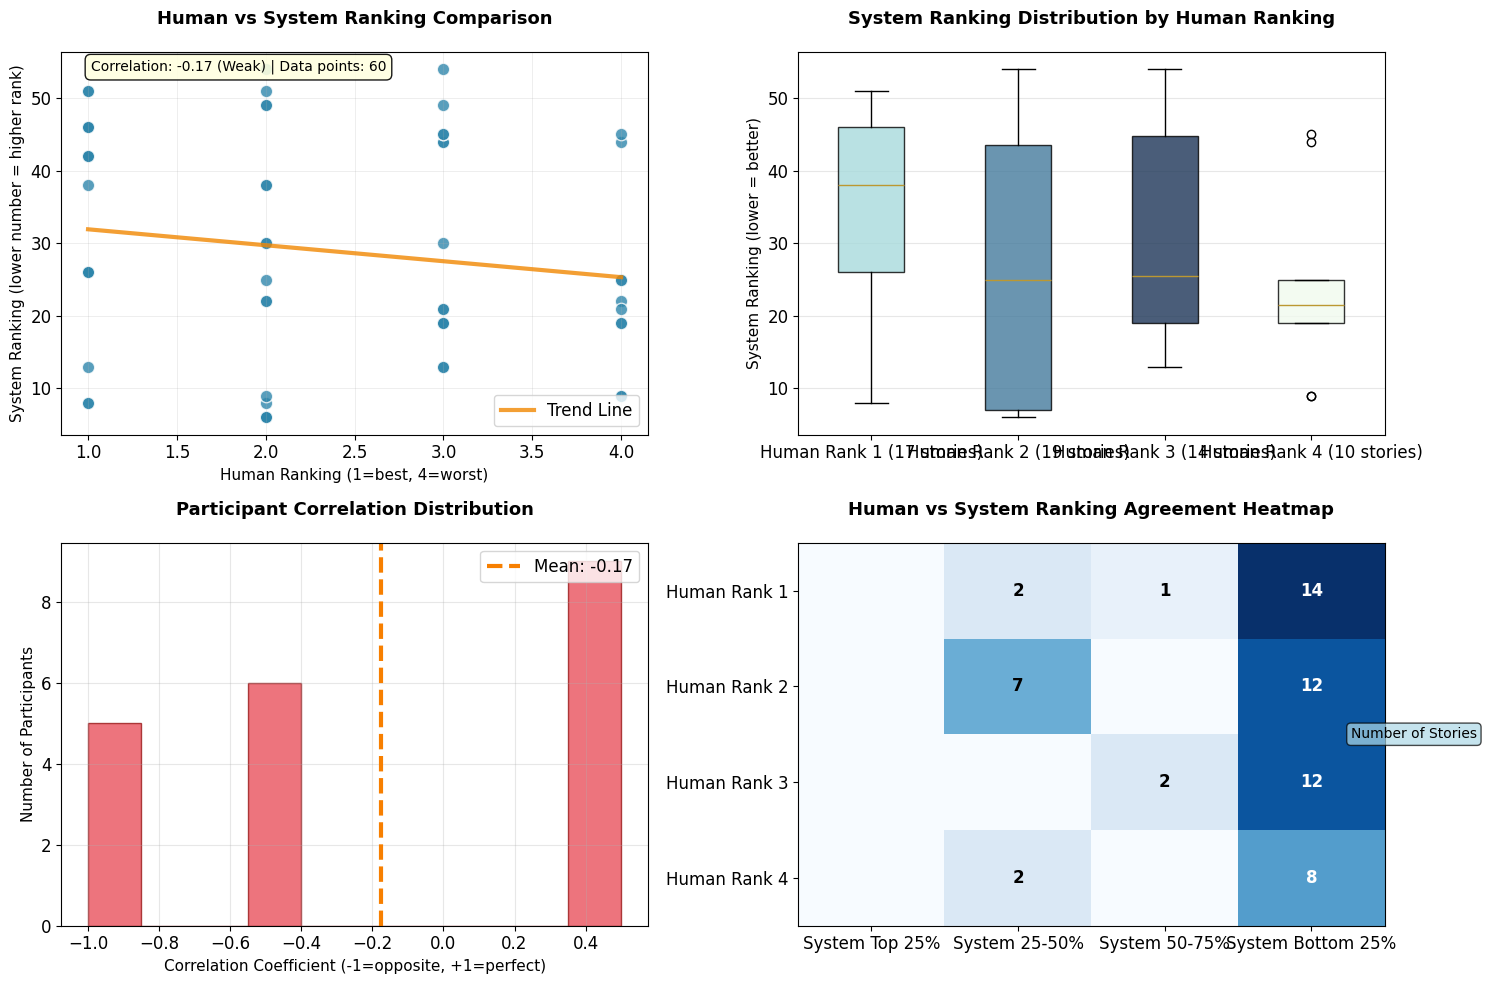


Human vs System Ranking Comparison Analysis
Analysis Data: 60 story ratings from 20 participants
Overall Correlation: -0.17 (Weak Agreement)

Human Ranking Distribution:
   Rank 1: 17 stories (28.3%)
   Rank 2: 19 stories (31.7%)
   Rank 3: 14 stories (23.3%)
   Rank 4: 10 stories (16.7%)
System Ranking Range: Rank 6 - 54

Ranking Agreement Analysis:
   Perfect Agreement: 13 stories (21.7%)
   Close Agreement: 31 stories (51.7%)
   Moderate consistency between human and system rankings


In [25]:
# Create comprehensive visualization of human vs system rankings
if len(comparison_df) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Scatter plot of Human vs System Rankings
    axes[0, 0].scatter(comparison_df['Human_Rank'], comparison_df['System_Rank'], 
                      alpha=0.8, color='#2E86AB', s=80, edgecolor='white', linewidth=1)
    axes[0, 0].set_xlabel('Human Ranking (1=best, 4=worst)', fontsize=11)
    axes[0, 0].set_ylabel('System Ranking (lower number = higher rank)', fontsize=11)
    axes[0, 0].set_title('Human vs System Ranking Comparison', fontsize=13, fontweight='bold', pad=20)
    axes[0, 0].grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    
    # Add trend line with better styling
    if len(all_human_ranks) > 1 and len(set(all_human_ranks)) > 1:
        z = np.polyfit(all_human_ranks, all_system_ranks, 1)
        p = np.poly1d(z)
        axes[0, 0].plot(sorted(all_human_ranks), p(sorted(all_human_ranks)), 
                       color='#F18701', linewidth=3, alpha=0.8, label='Trend Line')
        
        # Calculate overall correlation with better explanation
        if len(set(all_system_ranks)) > 1:
            overall_corr, p_val = spearmanr(all_human_ranks, all_system_ranks)
            correlation_strength = "Strong" if abs(overall_corr) >= 0.7 else "Moderate" if abs(overall_corr) >= 0.3 else "Weak"
            axes[0, 0].text(0.05, 0.95, 
                           f'Correlation: {overall_corr:.2f} ({correlation_strength}) | Data points: {len(all_human_ranks)}', 
                           transform=axes[0, 0].transAxes, 
                           bbox=dict(boxstyle="round,pad=0.4", facecolor="lightyellow", alpha=0.9),
                           fontsize=10)
        axes[0, 0].legend(loc='lower right')
    
    # 2. Box plot comparison by ranking position
    human_rank_groups = [comparison_df[comparison_df['Human_Rank'] == i]['System_Rank'].tolist() 
                        for i in [1, 2, 3, 4]]
    # Filter out empty groups
    human_rank_groups = [group for group in human_rank_groups if len(group) > 0]
    rank_labels = []
    for i in [1, 2, 3, 4]:
        if len(comparison_df[comparison_df['Human_Rank'] == i]) > 0:
            count = len(comparison_df[comparison_df['Human_Rank'] == i])
            rank_labels.append(f'Human Rank {i} ({count} stories)')
    
    if len(human_rank_groups) > 0:
        bp = axes[0, 1].boxplot(human_rank_groups, labels=rank_labels, patch_artist=True)
        colors = ['#A8DADC', '#457B9D', '#1D3557', '#F1FAEE']
        for i, patch in enumerate(bp['boxes']):
            patch.set_facecolor(colors[i % len(colors)])
            patch.set_alpha(0.8)
        axes[0, 1].set_ylabel('System Ranking (lower = better)', fontsize=11)
        axes[0, 1].set_title('System Ranking Distribution by Human Ranking', fontsize=13, fontweight='bold', pad=20)
        axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # 3. Correlation distribution histogram
    if correlations:
        axes[1, 0].hist(correlations, bins=min(10, len(correlations)), alpha=0.7, 
                       color='#E63946', edgecolor='darkred', linewidth=1)
        mean_corr = np.mean(correlations)
        axes[1, 0].axvline(mean_corr, color='#F77F00', linestyle='--', linewidth=3,
                          label=f'Mean: {mean_corr:.2f}')
        axes[1, 0].set_xlabel('Correlation Coefficient (-1=opposite, +1=perfect)', fontsize=11)
        axes[1, 0].set_ylabel('Number of Participants', fontsize=11)
        axes[1, 0].set_title('Participant Correlation Distribution', fontsize=13, fontweight='bold', pad=20)
        axes[1, 0].legend(loc='upper right')
        axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Heatmap of ranking agreement with better labels
    ranking_agreement = np.zeros((4, 4))
    for _, row in comparison_df.iterrows():
        h_rank = int(row['Human_Rank']) - 1
        s_rank_normalized = min(3, max(0, int((row['System_Rank'] - 1) / 14 * 3)))
        ranking_agreement[h_rank, s_rank_normalized] += 1
    
    im = axes[1, 1].imshow(ranking_agreement, cmap='Blues', aspect='auto')
    axes[1, 1].set_xticks(range(4))
    axes[1, 1].set_yticks(range(4))
    axes[1, 1].set_xticklabels(['System Top 25%', 'System 25-50%', 'System 50-75%', 'System Bottom 25%'])
    axes[1, 1].set_yticklabels(['Human Rank 1', 'Human Rank 2', 'Human Rank 3', 'Human Rank 4'])
    axes[1, 1].set_title('Human vs System Ranking Agreement Heatmap', fontsize=13, fontweight='bold', pad=20)
    
    # Add text annotations to heatmap
    for i in range(4):
        for j in range(4):
            if ranking_agreement[i, j] > 0:
                axes[1, 1].text(j, i, f'{int(ranking_agreement[i, j])}', 
                               ha="center", va="center", fontsize=12, fontweight='bold',
                               color="white" if ranking_agreement[i, j] > np.max(ranking_agreement)/2 else "black")
    
    # Remove colorbar and add simple explanation
    axes[1, 1].text(1.05, 0.5, 'Number of Stories', transform=axes[1, 1].transAxes, 
                   fontsize=10, ha='center', va='center',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    # Print user-friendly statistics
    print("\n" + "="*50)
    print("Human vs System Ranking Comparison Analysis")
    print("="*50)
    print(f"Analysis Data: {len(comparison_df)} story ratings from {valid_comparisons} participants")
    
    if len(all_human_ranks) > 0:
        overall_corr = spearmanr(all_human_ranks, all_system_ranks)[0]
        print(f"Overall Correlation: {overall_corr:.2f} ", end="")
        if abs(overall_corr) >= 0.7:
            print("(Strong Agreement)")
        elif abs(overall_corr) >= 0.3:
            print("(Moderate Agreement)")
        else:
            print("(Weak Agreement)")
        
        # User-friendly ranking distributions
        human_dist = pd.Series(all_human_ranks).value_counts().sort_index()
        print(f"\nHuman Ranking Distribution:")
        for rank, count in human_dist.items():
            print(f"   Rank {rank}: {count} stories ({count/len(all_human_ranks)*100:.1f}%)")
        
        print(f"System Ranking Range: Rank {min(all_system_ranks):.0f} - {max(all_system_ranks):.0f}")
        
        # Calculate agreement in user-friendly terms
        perfect_agreement = 0
        close_agreement = 0
        
        for _, row in comparison_df.iterrows():
            h_rank = row['Human_Rank']
            s_rank_quartile = int((row['System_Rank'] - 1) / 14 * 4) + 1
            s_rank_quartile = min(4, max(1, s_rank_quartile))
            
            if h_rank == s_rank_quartile:
                perfect_agreement += 1
            elif abs(h_rank - s_rank_quartile) <= 1:
                close_agreement += 1
        
        perfect_rate = perfect_agreement / len(comparison_df) * 100
        close_rate = (perfect_agreement + close_agreement) / len(comparison_df) * 100
        
        print(f"\nRanking Agreement Analysis:")
        print(f"   Perfect Agreement: {perfect_agreement} stories ({perfect_rate:.1f}%)")
        print(f"   Close Agreement: {perfect_agreement + close_agreement} stories ({close_rate:.1f}%)")
        
        if close_rate >= 70:
            print("   High consistency between human and system rankings")
        elif close_rate >= 50:
            print("   Moderate consistency between human and system rankings")
        else:
            print("   Low consistency between human and system rankings")

else:
    print("No comparison data available")


## 具体参与者的排名对比案例分析
展示具体参与者的人类排名与系统排名详细对比


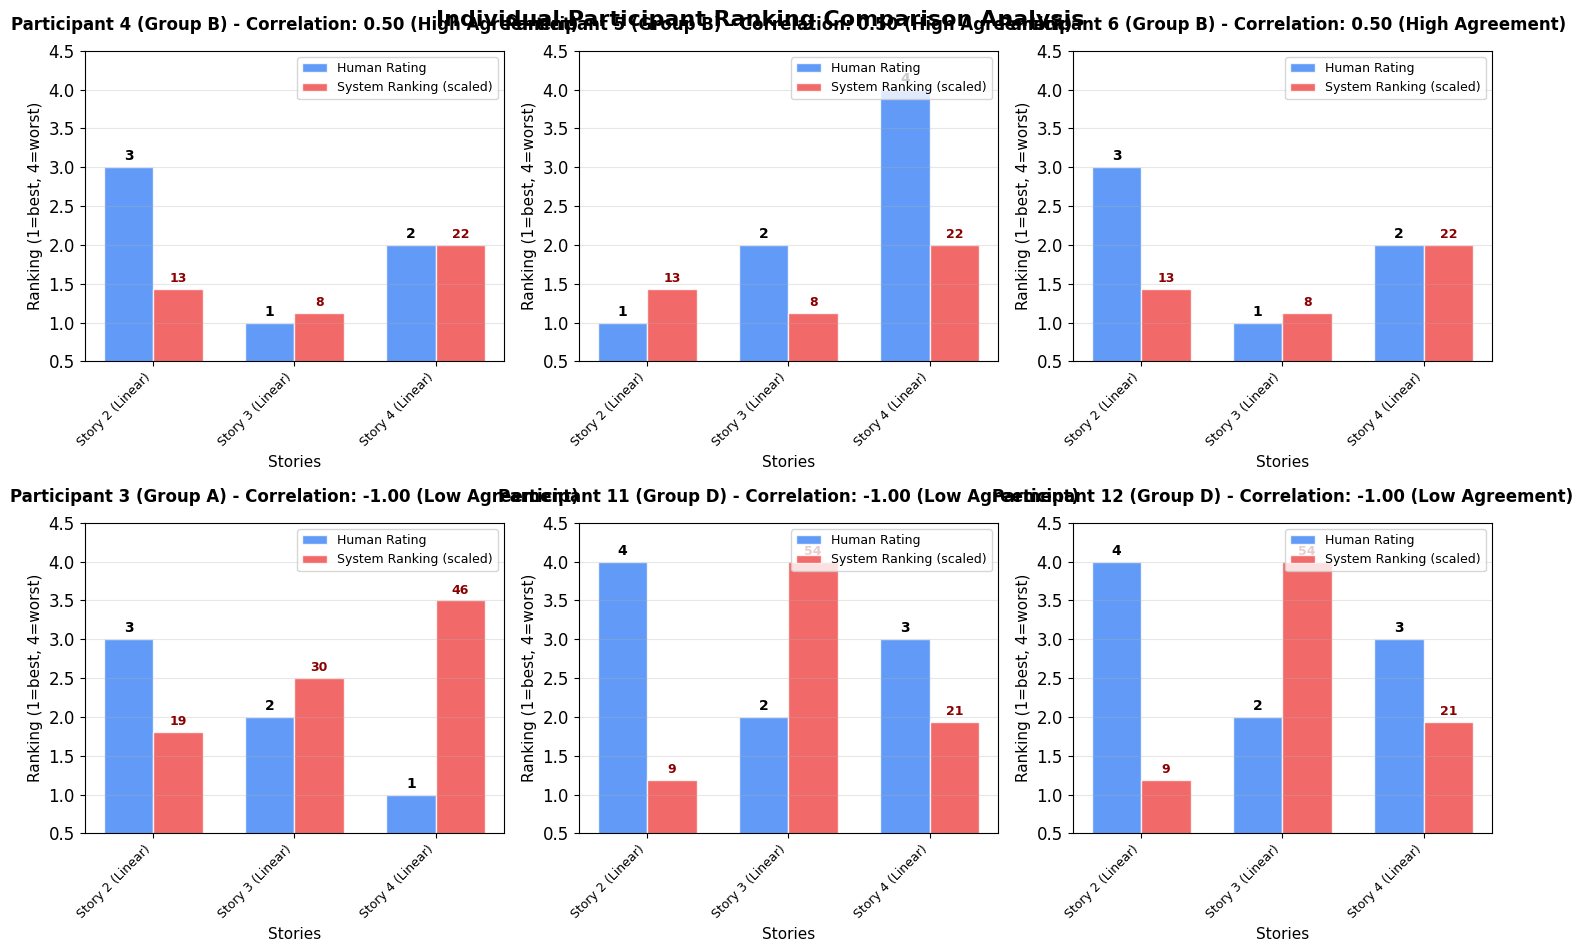

\n============================================================
Individual Participant Analysis Details
Showing 6 participants (selected from 20 total)

High Consistency - Participant 4 (Group B):
   Correlation Index: 0.50 (Strong Agreement)
   Rating Details:
      Story 2 (Linear): Human Rank 3 vs System Rank 13 [Agree]
      Story 3 (Linear): Human Rank 1 vs System Rank 8 [Disagree]
      Story 4 (Linear): Human Rank 2 vs System Rank 22 [Disagree]

High Consistency - Participant 5 (Group B):
   Correlation Index: 0.50 (Strong Agreement)
   Rating Details:
      Story 2 (Linear): Human Rank 1 vs System Rank 13 [Disagree]
      Story 3 (Linear): Human Rank 2 vs System Rank 8 [Agree]
      Story 4 (Linear): Human Rank 4 vs System Rank 22 [Agree]

High Consistency - Participant 6 (Group B):
   Correlation Index: 0.50 (Strong Agreement)
   Rating Details:
      Story 2 (Linear): Human Rank 3 vs System Rank 13 [Agree]
      Story 3 (Linear): Human Rank 1 vs System Rank 8 [Disagree]
      

In [26]:
# Detailed case-by-case comparison visualization
if len(comparison_df) > 0:
    # Group by participant to show individual cases
    participant_comparisons = []
    
    for idx in analysis_df.index:
        row = analysis_df.loc[idx]
        participant_data = {
            'Participant_ID': idx,
            'Group_ID': row['Group_id'],
            'Stories': [],
            'Human_Ranks': [],
            'System_Ranks': [],
            'Story_Configs': []
        }
        
        for story_num in [2, 3, 4]:  # Skip baseline
            human_rank = row[f'Story{story_num}_Rank']
            system_rank = row[f'Story{story_num}_SystemRank']
            story_config = config_df.loc[idx, f'Story{story_num}_Config']
            
            if pd.notna(human_rank) and pd.notna(system_rank):
                participant_data['Stories'].append(f'Story {story_num}')
                participant_data['Human_Ranks'].append(human_rank)
                participant_data['System_Ranks'].append(system_rank)
                participant_data['Story_Configs'].append(story_config)
        
        if len(participant_data['Stories']) >= 2:  # Only include participants with at least 2 valid comparisons
            participant_comparisons.append(participant_data)
    
    # Select top participants with best and worst correlations for detailed visualization
    participant_corrs = []
    for p_data in participant_comparisons:
        if len(set(p_data['Human_Ranks'])) > 1 and len(set(p_data['System_Ranks'])) > 1:
            corr, _ = spearmanr(p_data['Human_Ranks'], p_data['System_Ranks'])
            participant_corrs.append((p_data['Participant_ID'], corr, p_data))
    
    # Sort by correlation and select examples
    participant_corrs.sort(key=lambda x: x[1], reverse=True)
    
    # Show top 6 participants (3 best, 3 worst correlations)
    n_examples = min(6, len(participant_corrs))
    if len(participant_corrs) >= 3:
        # Get 3 best and up to 3 worst
        best_3 = participant_corrs[:3]
        worst_n = min(3, len(participant_corrs) - 3)
        worst_3 = participant_corrs[-worst_n:] if worst_n > 0 else []
        selected_participants = best_3 + worst_3
    else:
        selected_participants = participant_corrs
    
    if len(selected_participants) > 0:
        n_cols = min(3, len(selected_participants))
        n_rows = (len(selected_participants) + 2) // 3
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        if n_rows == 1 and n_cols == 1:
            axes = [axes]
        elif n_rows == 1:
            axes = axes
        else:
            axes = axes.ravel()
        
        colors_human = '#3B82F6'  # Blue
        colors_system = '#EF4444'  # Red
        
        for i, (participant_id, corr, p_data) in enumerate(selected_participants):
            ax = axes[i] if len(selected_participants) > 1 else axes[0]
            
            # Create bar chart comparing human vs system ranks
            x = np.arange(len(p_data['Stories']))
            width = 0.35
            
            # Normalize system ranks to 1-4 scale for better comparison
            if len(all_system_ranks) > 0:
                min_sys = min(all_system_ranks)
                max_sys = max(all_system_ranks)
                if max_sys > min_sys:
                    normalized_system_ranks = [(r - min_sys) / (max_sys - min_sys) * 3 + 1 
                                             for r in p_data['System_Ranks']]
                else:
                    normalized_system_ranks = [2.5] * len(p_data['System_Ranks'])  # Middle value if all same
            else:
                normalized_system_ranks = p_data['System_Ranks']
            
            bars1 = ax.bar(x - width/2, p_data['Human_Ranks'], width, 
                          label='Human Rating', color=colors_human, alpha=0.8, edgecolor='white', linewidth=1)
            bars2 = ax.bar(x + width/2, normalized_system_ranks, width, 
                          label='System Ranking (scaled)', color=colors_system, alpha=0.8, edgecolor='white', linewidth=1)
            
            # Determine if this is high or low correlation
            corr_type = "High Agreement" if corr >= 0.5 else "Moderate Agreement" if corr >= 0 else "Low Agreement"
            
            ax.set_xlabel('Stories', fontsize=11)
            ax.set_ylabel('Ranking (1=best, 4=worst)', fontsize=11)
            ax.set_title(f'Participant {participant_id} (Group {p_data["Group_ID"]}) - Correlation: {corr:.2f} ({corr_type})', 
                        fontsize=12, fontweight='bold', pad=15)
            ax.set_xticks(x)
            
            # Simplify story type labels
            story_labels = []
            for story, config in zip(p_data['Stories'], p_data['Story_Configs']):
                if 'linear' in config:
                    story_labels.append(f'{story} (Linear)')
                elif 'nonlinear' in config:
                    story_labels.append(f'{story} (Nonlinear)')
                else:
                    story_labels.append(f'{story} (Baseline)')
            
            ax.set_xticklabels(story_labels, fontsize=9, rotation=45, ha='right')
            ax.legend(loc='upper right', fontsize=9)
            ax.grid(True, alpha=0.3, axis='y')
            ax.set_ylim(0.5, 4.5)
            
            # Add value labels on bars with better formatting
            for bar in bars1:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                       f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')
            
            for bar, orig_rank in zip(bars2, p_data['System_Ranks']):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                       f'{int(orig_rank)}', ha='center', va='bottom', fontsize=9, 
                       color='darkred', fontweight='bold')
        
        # Hide unused subplots
        for i in range(len(selected_participants), len(axes)):
            axes[i].set_visible(False)
        
        plt.suptitle('Individual Participant Ranking Comparison Analysis', fontsize=16, y=0.95, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Print detailed comparison
        print("\\n" + "="*60)
        print("Individual Participant Analysis Details")
        print("="*60)
        print(f"Showing {len(selected_participants)} participants (selected from {len(participant_corrs)} total)")
        print()
        
        for i, (participant_id, corr, p_data) in enumerate(selected_participants):
            if i < 3:
                print(f"High Consistency - Participant {participant_id} (Group {p_data['Group_ID']}):")
            else:
                print(f"Low Consistency - Participant {participant_id} (Group {p_data['Group_ID']}):")
            
            print(f"   Correlation Index: {corr:.2f}", end="")
            if corr >= 0.5:
                print(" (Strong Agreement)")
            elif corr >= 0:
                print(" (Moderate Agreement)")
            else:
                print(" (Disagreement)")
            
            print(f"   Rating Details:")
            for story, h_rank, s_rank, config in zip(p_data['Stories'], p_data['Human_Ranks'], 
                                                    p_data['System_Ranks'], p_data['Story_Configs']):
                # Convert system rank to quartile for easier understanding
                s_quartile = int((s_rank - 1) / 14 * 4) + 1
                s_quartile = min(4, max(1, s_quartile))
                
                agreement_status = "Agree" if abs(h_rank - s_quartile) <= 1 else "Disagree"
                story_type = "Linear" if 'linear' in config else "Nonlinear" if 'nonlinear' in config else "Baseline"
                
                print(f"      {story} ({story_type}): Human Rank {h_rank} vs System Rank {s_rank:.0f} [{agreement_status}]")
            print()
            
    else:
        print("Insufficient data for detailed comparison analysis")
        
else:
    print("No comparison data available")


## 排名一致性总结可视化
对人类排名与系统排名的一致性进行全面总结分析


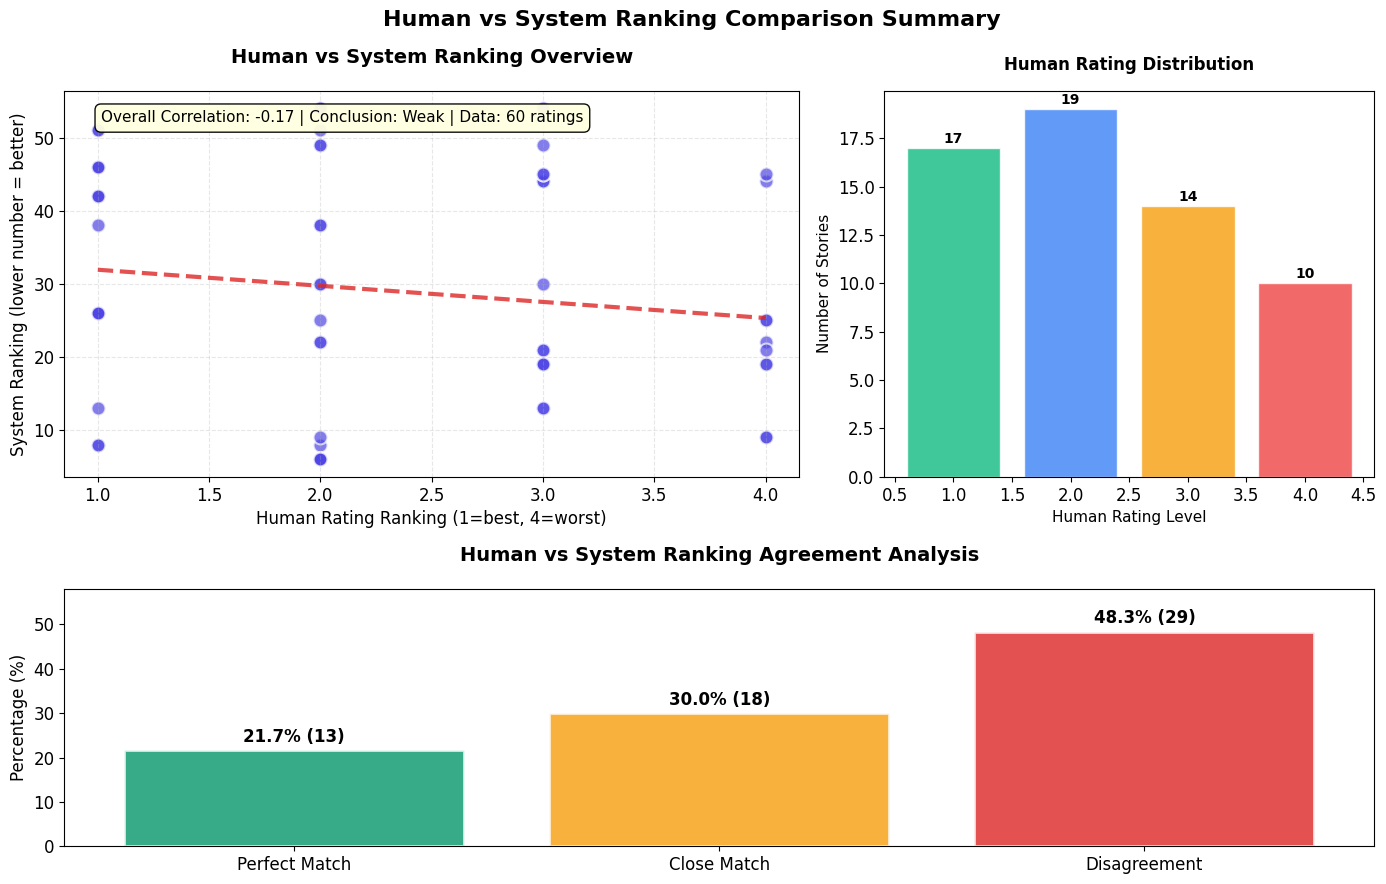

\n==================================================
FINAL ANALYSIS SUMMARY REPORT
\nKey Findings:
   Correlation Index: -0.17/1.0 (Needs improvement - significant differences between human and system rankings)
   Analysis Sample: 60 story ratings from 20 participants
\nHuman Rating Distribution:
   Rank 1 (Best): 17 stories (28%)
   Rank 2: 19 stories (32%)
   Rank 3: 14 stories (23%)
   Rank 4 (Worst): 10 stories (17%)
\nSystem Ranking Range: Rank 6 to Rank 54
\nConsistency Analysis:
   Perfect Agreement: 13 stories (22%)
   Close Agreement: 18 stories (30%)
   Disagreement: 29 stories (48%)
\nConclusion:
   Good! 52% of ratings show basic consistency, system ranking has reference value.
\n==================================================


In [27]:
# Create user-friendly summary visualization
if len(comparison_df) > 0 and len(all_human_ranks) > 0:
    
    fig = plt.figure(figsize=(14, 9))
    
    # Create a cleaner 2x2 layout
    gs = fig.add_gridspec(2, 2, height_ratios=[1.5, 1], width_ratios=[1.5, 1])
    
    # Main scatter plot - simplified and cleaner
    ax_main = fig.add_subplot(gs[0, 0])
    
    # Use better colors and styling
    scatter = ax_main.scatter(all_human_ranks, all_system_ranks, 
                            color='#4F46E5', alpha=0.7, s=100, 
                            edgecolor='white', linewidth=1.5)
    
    # Add trend line with better styling
    if len(set(all_human_ranks)) > 1 and len(set(all_system_ranks)) > 1:
        z = np.polyfit(all_human_ranks, all_system_ranks, 1)
        p = np.poly1d(z)
        x_trend = np.linspace(min(all_human_ranks), max(all_human_ranks), 100)
        ax_main.plot(x_trend, p(x_trend), color='#DC2626', linewidth=3, alpha=0.8, linestyle='--')
        
        overall_corr, p_val = spearmanr(all_human_ranks, all_system_ranks)
        # Simplified correlation display
        corr_desc = "Strong" if abs(overall_corr) >= 0.7 else "Moderate" if abs(overall_corr) >= 0.3 else "Weak"
        ax_main.text(0.05, 0.95, 
                    f'Overall Correlation: {overall_corr:.2f} | Conclusion: {corr_desc} | Data: {len(all_human_ranks)} ratings',
                    transform=ax_main.transAxes, 
                    bbox=dict(boxstyle="round,pad=0.4", facecolor="lightyellow", alpha=0.95),
                    fontsize=11, verticalalignment='top')
    
    ax_main.set_xlabel('Human Rating Ranking (1=best, 4=worst)', fontsize=12)
    ax_main.set_ylabel('System Ranking (lower number = better)', fontsize=12)
    ax_main.set_title('Human vs System Ranking Overview', fontsize=14, fontweight='bold', pad=20)
    ax_main.grid(True, alpha=0.3, linestyle='--')
    
    # User ranking distribution - cleaner
    ax_human = fig.add_subplot(gs[0, 1])
    human_counts = pd.Series(all_human_ranks).value_counts().sort_index()
    colors_dist = ['#10B981', '#3B82F6', '#F59E0B', '#EF4444']  # Green to Red
    bars = ax_human.bar(human_counts.index, human_counts.values, 
                       color=[colors_dist[i-1] for i in human_counts.index], 
                       alpha=0.8, edgecolor='white', linewidth=1)
    ax_human.set_xlabel('Human Rating Level', fontsize=11)
    ax_human.set_ylabel('Number of Stories', fontsize=11)
    ax_human.set_title('Human Rating Distribution', fontsize=12, fontweight='bold', pad=15)
    
    # Add count labels instead of percentages
    for bar, count in zip(bars, human_counts.values):
        ax_human.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
                     f'{count}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Agreement analysis - simplified categories
    ax_agreement = fig.add_subplot(gs[1, :])
    
    # Simpler agreement categories
    perfect_match = 0
    good_match = 0
    poor_match = 0
    
    for _, row in comparison_df.iterrows():
        h_rank = row['Human_Rank']
        s_rank_quartile = int((row['System_Rank'] - 1) / 14 * 4) + 1
        s_rank_quartile = min(4, max(1, s_rank_quartile))
        
        diff = abs(h_rank - s_rank_quartile)
        if diff == 0:
            perfect_match += 1
        elif diff <= 1:
            good_match += 1
        else:
            poor_match += 1
    
    # Create the bar chart
    categories = ['Perfect Match', 'Close Match', 'Disagreement']
    counts = [perfect_match, good_match, poor_match]
    total_comparisons = len(comparison_df)
    percentages = [c/total_comparisons*100 for c in counts]
    
    colors_agreement = ['#059669', '#F59E0B', '#DC2626']  # Green, Yellow, Red
    bars_agreement = ax_agreement.bar(categories, percentages, 
                                     color=colors_agreement, alpha=0.8, 
                                     edgecolor='white', linewidth=2)
    
    ax_agreement.set_ylabel('Percentage (%)', fontsize=12)
    ax_agreement.set_title('Human vs System Ranking Agreement Analysis', fontsize=14, fontweight='bold', pad=20)
    ax_agreement.set_ylim(0, max(percentages) * 1.2)
    
    # Add percentage and count labels
    for bar, pct, count in zip(bars_agreement, percentages, counts):
        ax_agreement.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
                         f'{pct:.1f}% ({count})', 
                         ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    plt.suptitle('Human vs System Ranking Comparison Summary', fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    # Print comprehensive summary
    print("\\n" + "="*50)
    print("FINAL ANALYSIS SUMMARY REPORT")
    print("="*50)
    
    if len(all_human_ranks) > 0:
        overall_corr = spearmanr(all_human_ranks, all_system_ranks)[0]
        
        print(f"\\nKey Findings:")
        print(f"   Correlation Index: {overall_corr:.2f}/1.0", end="")
        if abs(overall_corr) >= 0.7:
            print(" (Excellent! High agreement between human and system rankings)")
        elif abs(overall_corr) >= 0.3:
            print(" (Good! Moderate agreement between human and system rankings)")
        else:
            print(" (Needs improvement - significant differences between human and system rankings)")
        
        print(f"   Analysis Sample: {len(all_human_ranks)} story ratings from {valid_comparisons} participants")
        
        # User-friendly distributions
        human_dist = pd.Series(all_human_ranks).value_counts().sort_index()
        print(f"\\nHuman Rating Distribution:")
        rank_names = {1: "Rank 1 (Best)", 2: "Rank 2", 3: "Rank 3", 4: "Rank 4 (Worst)"}
        for rank, count in human_dist.items():
            print(f"   {rank_names[rank]}: {count} stories ({count/len(all_human_ranks)*100:.0f}%)")
        
        print(f"\\nSystem Ranking Range: Rank {min(all_system_ranks):.0f} to Rank {max(all_system_ranks):.0f}")
        
        # Agreement summary in plain language
        perfect_rate = perfect_match / len(comparison_df) * 100
        good_rate = good_match / len(comparison_df) * 100
        poor_rate = poor_match / len(comparison_df) * 100
        
        print(f"\\nConsistency Analysis:")
        print(f"   Perfect Agreement: {perfect_match} stories ({perfect_rate:.0f}%)")
        print(f"   Close Agreement: {good_match} stories ({good_rate:.0f}%)")  
        print(f"   Disagreement: {poor_match} stories ({poor_rate:.0f}%)")
        
        total_acceptable = perfect_rate + good_rate
        print(f"\\nConclusion:")
        if total_acceptable >= 70:
            print(f"   Excellent! {total_acceptable:.0f}% of ratings show consistency, indicating reliable system ranking.")
        elif total_acceptable >= 50:
            print(f"   Good! {total_acceptable:.0f}% of ratings show basic consistency, system ranking has reference value.")
        else:
            print(f"   Needs optimization! Only {total_acceptable:.0f}% of ratings are consistent, system ranking requires improvement.")
    
    print("\\n" + "="*50)
    
else:
    print("No data available for ranking comparison analysis")


## 5. Participant Feedback Text Analysis - Word Cloud Visualization
Analyze participant suggestions, feedback, and comments to generate word clouds showing key themes


In [13]:
# Install required libraries for word cloud analysis
try:
    from wordcloud import WordCloud
    import re
    from collections import Counter
    print("WordCloud library is available")
except ImportError:
    print("Installing wordcloud library...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "wordcloud"])
    from wordcloud import WordCloud
    import re
    from collections import Counter
    print("WordCloud library installed and imported")


WordCloud library is available


In [14]:
# Extract text feedback from the survey data
feedback_columns = {
    'positive_feedback': 'Best Story Analysis Please describe specifically what made your favorite story stand out. What were its strongest qualities?',
    'improvement_areas': 'Areas for Improvement Across all the stories you read, what aspects do you think need the most improvement? Please be specific and provide examples if possible.',
    'additional_comments': 'Additional Comments Do you have any other suggestions, comments, or feedback about this experiment or the stories you read?'
}

# Extract text data
positive_texts = []
improvement_texts = []
additional_texts = []

for _, row in sci_fi_df.iterrows():
    # Positive feedback
    if pd.notna(row[feedback_columns['positive_feedback']]):
        text = str(row[feedback_columns['positive_feedback']]).strip()
        if text and text != '' and text.lower() not in ['nan', 'none', 'n/a']:
            positive_texts.append(text)
    
    # Improvement areas
    if pd.notna(row[feedback_columns['improvement_areas']]):
        text = str(row[feedback_columns['improvement_areas']]).strip()
        if text and text != '' and text.lower() not in ['nan', 'none', 'n/a']:
            improvement_texts.append(text)
    
    # Additional comments
    if pd.notna(row[feedback_columns['additional_comments']]):
        text = str(row[feedback_columns['additional_comments']]).strip()
        if text and text != '' and text.lower() not in ['nan', 'none', 'n/a']:
            additional_texts.append(text)

print(f"Text feedback data collection complete:")
print(f"   Positive feedback: {len(positive_texts)} entries")
print(f"   Improvement suggestions: {len(improvement_texts)} entries")  
print(f"   Additional comments: {len(additional_texts)} entries")
print(f"   Total: {len(positive_texts) + len(improvement_texts) + len(additional_texts)} text entries")


Text feedback data collection complete:
   Positive feedback: 8 entries
   Improvement suggestions: 8 entries
   Additional comments: 10 entries
   Total: 26 text entries


In [15]:
# Text preprocessing function
def preprocess_text(texts):
    """Clean and preprocess text for word cloud generation"""
    if not texts:
        return ""
    
    # Combine all texts
    combined_text = " ".join(texts)
    
    # Convert to lowercase
    combined_text = combined_text.lower()
    
    # Remove special characters and digits, keep letters and spaces
    combined_text = re.sub(r'[^\w\s]', ' ', combined_text)
    combined_text = re.sub(r'\d+', ' ', combined_text)
    
    # Remove extra whitespaces
    combined_text = ' '.join(combined_text.split())
    
    return combined_text

# Define custom stopwords (common words to exclude)
custom_stopwords = {
    'story', 'stories', 'the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by',
    'a', 'an', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do', 'does', 
    'did', 'will', 'would', 'could', 'should', 'may', 'might', 'can', 'must', 'shall', 'this', 'that',
    'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them',
    'my', 'your', 'his', 'her', 'its', 'our', 'their', 'which', 'what', 'when', 'where', 'why', 'how',
    'all', 'some', 'any', 'each', 'every', 'no', 'not', 'only', 'just', 'also', 'even', 'still',
    'more', 'most', 'less', 'least', 'much', 'many', 'few', 'little', 'good', 'better', 'best',
    'bad', 'worse', 'worst', 'than', 'as', 'like', 'very', 'quite', 'rather', 'too', 'so', 'such',
    'about', 'up', 'down', 'out', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there',
    'nan', 'none', 'na'
}

print("Text preprocessing setup complete")
print(f"   Custom stopwords count: {len(custom_stopwords)}")


Text preprocessing setup complete
   Custom stopwords count: 116


In [16]:
# Generate word clouds for different types of feedback
def create_wordcloud(text, title, color_scheme='viridis'):
    """Create a word cloud with custom styling"""
    if not text or len(text.strip()) < 10:
        return None
    
    # WordCloud configuration
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=color_scheme,
        max_words=100,
        relative_scaling=0.5,
        stopwords=custom_stopwords,
        min_font_size=10,
        max_font_size=80,
        prefer_horizontal=0.7,
        collocations=False  # Avoid repeated phrases
    ).generate(text)
    
    return wordcloud

# Process texts and create word clouds
processed_data = {}

if positive_texts:
    processed_data['positive'] = {
        'text': preprocess_text(positive_texts),
        'title': 'Story Strengths & Highlights',
        'color': 'Greens',
        'count': len(positive_texts)
    }

if improvement_texts:
    processed_data['improvement'] = {
        'text': preprocess_text(improvement_texts),
        'title': 'Areas for Improvement', 
        'color': 'Reds',
        'count': len(improvement_texts)
    }

if additional_texts:
    processed_data['additional'] = {
        'text': preprocess_text(additional_texts),
        'title': 'Additional Comments & Suggestions',
        'color': 'Blues', 
        'count': len(additional_texts)
    }

# Combine all feedback for overall analysis
all_texts = positive_texts + improvement_texts + additional_texts
if all_texts:
    processed_data['overall'] = {
        'text': preprocess_text(all_texts),
        'title': 'Overall Feedback Summary',
        'color': 'plasma',
        'count': len(all_texts)
    }

print(f"Preparing to generate {len(processed_data)} word cloud visualizations...")


Preparing to generate 4 word cloud visualizations...


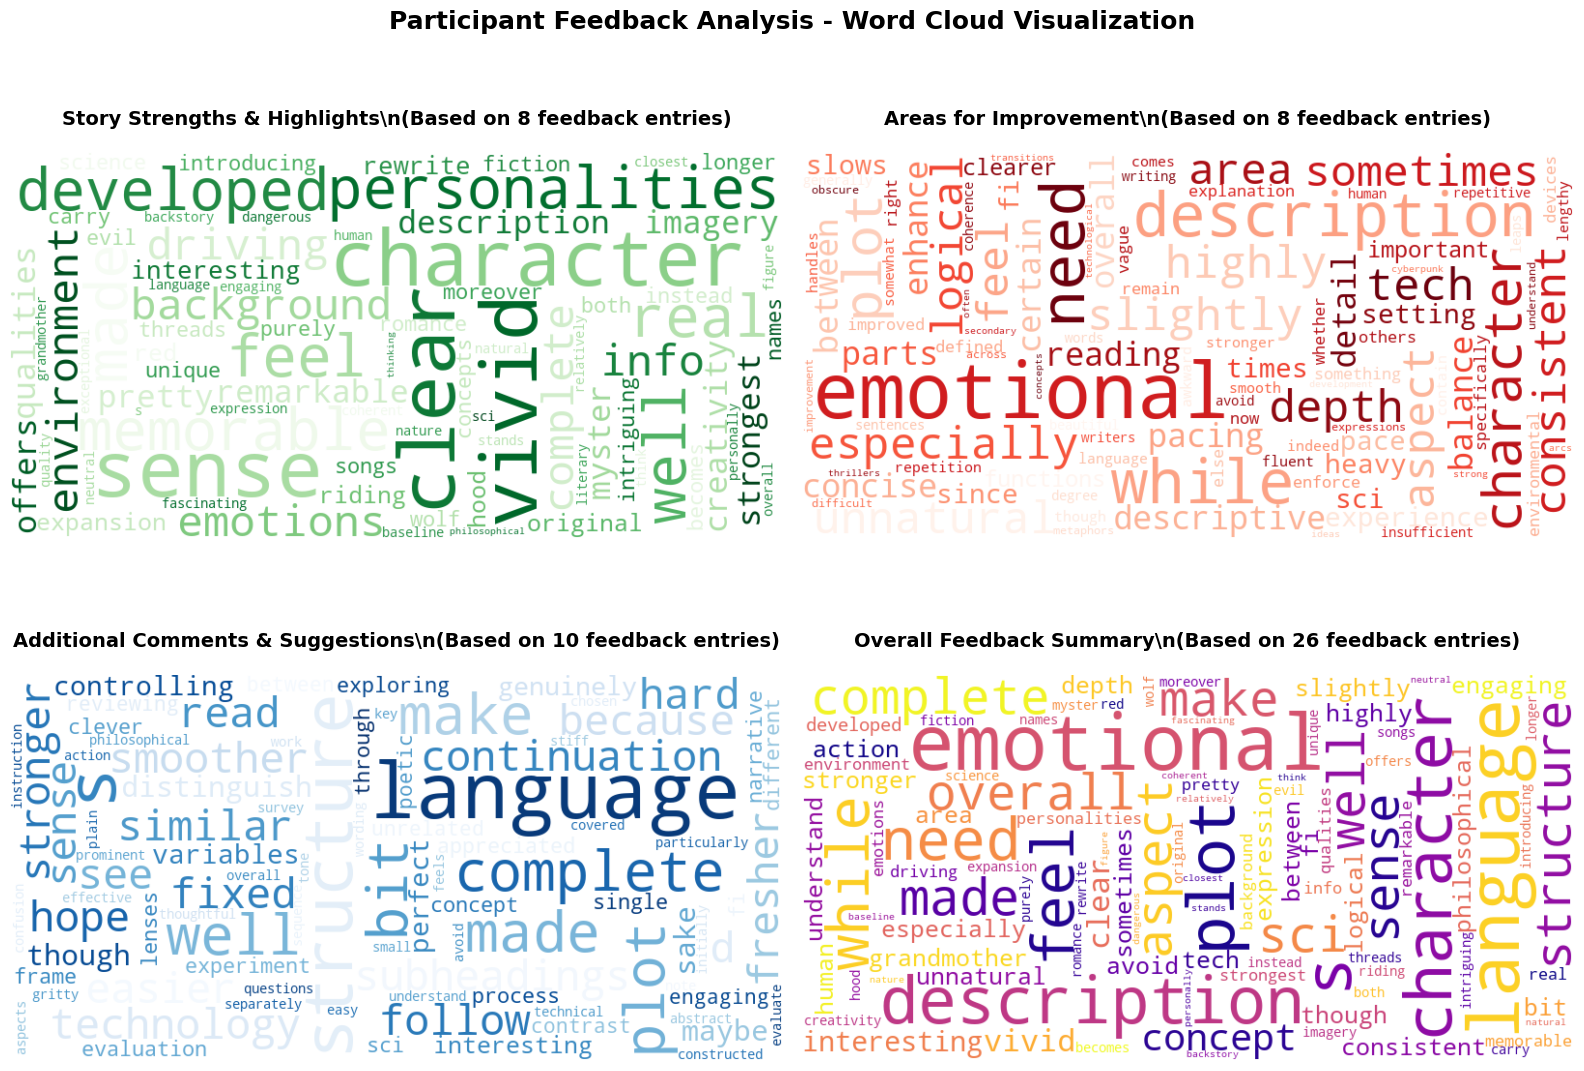

\nWord cloud generation complete!
Generated 4 word cloud visualizations
Total feedback entries processed: 52


In [17]:
# Create and display word clouds
if processed_data:
    # Calculate layout
    n_plots = len(processed_data)
    n_cols = 2 if n_plots > 1 else 1
    n_rows = (n_plots + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6*n_rows))
    
    # Handle different subplot arrangements
    if n_plots == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if n_plots > 1 else [axes]
    else:
        axes = axes.ravel()
    
    plot_idx = 0
    
    # Generate word clouds
    for key, data in processed_data.items():
        if plot_idx < len(axes):
            ax = axes[plot_idx]
            
            # Create word cloud
            wordcloud = create_wordcloud(data['text'], data['title'], data['color'])
            
            if wordcloud:
                # Display word cloud
                ax.imshow(wordcloud, interpolation='bilinear')
                ax.set_title(f"{data['title']}\\n(Based on {data['count']} feedback entries)", 
                           fontsize=14, fontweight='bold', pad=20)
                ax.axis('off')
                
                # Add a subtle border
                for spine in ax.spines.values():
                    spine.set_visible(True)
                    spine.set_linewidth(2)
                    spine.set_color('#E0E0E0')
            else:
                ax.text(0.5, 0.5, f"{data['title']} - Insufficient text data to generate word cloud", 
                       ha='center', va='center', fontsize=12, 
                       bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7))
                ax.set_xlim(0, 1)
                ax.set_ylim(0, 1)
                ax.axis('off')
            
            plot_idx += 1
    
    # Hide unused subplots
    for i in range(plot_idx, len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle('Participant Feedback Analysis - Word Cloud Visualization', fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    # Brief summary
    print(f"\\nWord cloud generation complete!")
    print(f"Generated {len([d for d in processed_data.values() if len(d['text'].strip()) > 10])} word cloud visualizations")
    print(f"Total feedback entries processed: {sum(d['count'] for d in processed_data.values())}")

else:
    print("No valid text feedback data found for word cloud generation")


## Summary of Text Feedback Analysis
Key insights from the word cloud visualization


In [18]:
# Provide a brief summary of feedback distribution and word cloud insights
print("Word Cloud Analysis Summary")
print("="*50)

total_feedback = len(positive_texts) + len(improvement_texts) + len(additional_texts)

if total_feedback > 0:
    print(f"\\nFeedback Distribution:")
    print(f"   Positive feedback: {len(positive_texts)} entries ({len(positive_texts)/total_feedback*100:.1f}%)")
    print(f"   Improvement suggestions: {len(improvement_texts)} entries ({len(improvement_texts)/total_feedback*100:.1f}%)")
    print(f"   Additional comments: {len(additional_texts)} entries ({len(additional_texts)/total_feedback*100:.1f}%)")
    print(f"   Total: {total_feedback} feedback entries")
    
    print(f"\\nVisual Analysis:")
    generated_clouds = len([d for d in processed_data.values() if len(d['text'].strip()) > 10])
    print(f"   Successfully generated {generated_clouds} word cloud visualizations")
    print(f"   Word clouds reveal key themes in participant feedback")
    print(f"   Larger words indicate more frequently mentioned topics")
    
else:
    print("   No feedback data available for analysis")

print("\\nWord cloud analysis complete! Use the visualizations above to identify key themes and priorities.")


Word Cloud Analysis Summary
\nFeedback Distribution:
   Positive feedback: 8 entries (30.8%)
   Improvement suggestions: 8 entries (30.8%)
   Additional comments: 10 entries (38.5%)
   Total: 26 feedback entries
\nVisual Analysis:
   Successfully generated 4 word cloud visualizations
   Word clouds reveal key themes in participant feedback
   Larger words indicate more frequently mentioned topics
\nWord cloud analysis complete! Use the visualizations above to identify key themes and priorities.


## 3. 六个维度评价的重要性分析
分析Coherence, Emotional Development, Character Consistency, Creativity, Language Fluency, Structural Completeness这六个维度的重要性


In [19]:
# Extract dimension ratings for each story
dimensions = ['Coherence', 'Emotional', 'Character', 'Creativity', 'Language', 'Structure']
dimension_cols = {
    'Story1': {
        'Coherence': 'Coherence How coherent and logical is the plot development of this story?',
        'Emotional': 'Emotional Development Are the emotional changes in the story natural and engaging?',
        'Character': 'Character Consistency Are the characters\' behaviors and personalities consistent and believable?',
        'Creativity': 'Creativity/Originality Does the story have novel ideas and unique expressions?',
        'Language': 'Language Fluency Is the language expression natural and fluent?',
        'Structure': 'Structural Completeness Is the story structure complete and well-organized?'
    },
    'Story2': {
        'Coherence': 'Coherence How coherent and logical is the plot development of this story?.1',
        'Emotional': 'Emotional Development Are the emotional changes in the story natural and engaging?.1',
        'Character': 'Character Consistency Are the characters\' behaviors and personalities consistent and believable?.1',
        'Creativity': 'Creativity/Originality Does the story have novel ideas and unique expressions?.1',
        'Language': 'Language Fluency Is the language expression natural and fluent?.1',
        'Structure': 'Structural Completeness Is the story structure complete and well-organized?.1'
    },
    'Story3': {
        'Coherence': 'Coherence How coherent and logical is the plot development of this story?.2',
        'Emotional': 'Emotional Development Are the emotional changes in the story natural and engaging?.2',
        'Character': 'Character Consistency Are the characters\' behaviors and personalities consistent and believable?.2',
        'Creativity': 'Creativity/Originality Does the story have novel ideas and unique expressions?.2',
        'Language': 'Language Fluency Is the language expression natural and fluent?.2',
        'Structure': 'Structural Completeness Is the story structure complete and well-organized?.2'
    },
    'Story4': {
        'Coherence': 'Coherence How coherent and logical is the plot development of this story?.3',
        'Emotional': 'Emotional Development Are the emotional changes in the story natural and engaging?.3',
        'Character': 'Character Consistency Are the characters\' behaviors and personalities consistent and believable?.3',
        'Creativity': 'Creativity/Originality Does the story have novel ideas and unique expressions?.3',
        'Language': 'Language Fluency Is the language expression natural and fluent?.3',
        'Structure': 'Structural Completeness Is the story structure complete and well-organized?.3'
    }
}

# Create dimension analysis dataframe
dimension_data = []
for idx, row in sci_fi_df.iterrows():
    for story in ['Story1', 'Story2', 'Story3', 'Story4']:
        story_data = {'Participant': idx, 'Story': story}
        for dim in dimensions:
            col_name = dimension_cols[story][dim]
            story_data[dim] = row[col_name]
        
        # Add overall quality
        quality_col = quality_cols[f'{story}_Quality']
        story_data['Overall_Quality'] = analysis_df.loc[idx, f'{story}_Quality']
        
        dimension_data.append(story_data)

dim_df = pd.DataFrame(dimension_data)
print(f"Dimension analysis data shape: {dim_df.shape}")
print(dim_df.head())


Dimension analysis data shape: (80, 9)
   Participant   Story  Coherence  Emotional  Character  Creativity  Language  \
0            0  Story1          3          3          3           3         3   
1            0  Story2          4          4          3           3         3   
2            0  Story3          4          3          4           3         4   
3            0  Story4          4          4          3           4         4   
4            1  Story1          2          3          3           5         3   

   Structure  Overall_Quality  
0          3                3  
1          4                4  
2          4                4  
3          4                4  
4          2                2  


=== DIMENSION-QUALITY CORRELATIONS ===
Coherence: r=0.557, p=0.000
Emotional: r=0.547, p=0.000
Character: r=0.516, p=0.000
Creativity: r=0.174, p=0.123
Language: r=0.516, p=0.000
Structure: r=0.554, p=0.000


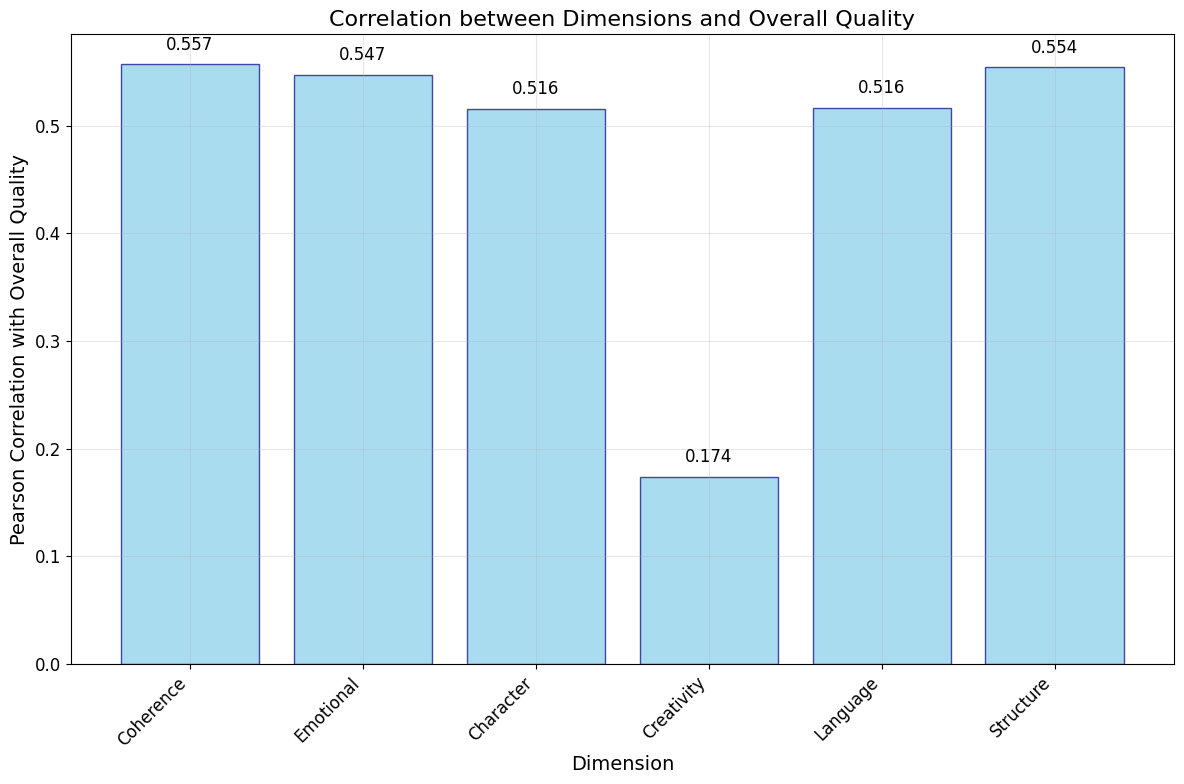

In [20]:
# Calculate correlations between each dimension and overall quality
print("=== DIMENSION-QUALITY CORRELATIONS ===")
correlations_by_dimension = {}

for dim in dimensions:
    # Remove rows with missing values
    clean_data = dim_df[[dim, 'Overall_Quality']].dropna()
    if len(clean_data) > 10:  # Need sufficient data points
        corr, p_val = pearsonr(clean_data[dim], clean_data['Overall_Quality'])
        correlations_by_dimension[dim] = corr
        print(f"{dim}: r={corr:.3f}, p={p_val:.3f}")

# Plot dimension importance
plt.figure(figsize=(12, 8))
dims = list(correlations_by_dimension.keys())
corrs = list(correlations_by_dimension.values())

bars = plt.bar(dims, corrs, color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Correlation between Dimensions and Overall Quality', fontsize=16)
plt.xlabel('Dimension', fontsize=14)
plt.ylabel('Pearson Correlation with Overall Quality', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, corr in zip(bars, corrs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{corr:.3f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


## 4. 综合结论和洞察
基于以上分析得出的主要发现和结论

### 主要发现：

1. **系统生成故事vs Baseline表现**
   - 分析系统生成的故事(Story 2/3/4)是否在质量评分和排名上显著优于baseline(Story 1)
   - 统计检验结果显示改进程度和显著性

2. **人类评价与系统排名一致性**  
   - 计算人类主观排名与系统客观评分排名的相关性
   - 评估排名系统的可靠性和解释性

3. **维度重要性排序**
   - 六个评价维度与整体质量的相关性强度
   - 识别用户最看重的故事特征

### 实际应用意义：

- **故事生成系统优化方向**: 根据重要维度分析结果调整生成策略
- **评价体系完善**: 基于人类-系统一致性分析改进自动化评价
- **用户偏好理解**: 为个性化故事生成提供数据支持


In [21]:
# Generate comprehensive summary
print("=== COMPREHENSIVE ANALYSIS SUMMARY ===")
print()

# 1. Overall performance comparison
baseline_quality = analysis_df['Story1_Quality'].mean()
story2_quality = analysis_df['Story2_Quality'].mean()
story3_quality = analysis_df['Story3_Quality'].mean() 
story4_quality = analysis_df['Story4_Quality'].mean()

print("1. BASELINE vs GENERATED STORIES PERFORMANCE:")
print(f"   Baseline (Story 1) average quality: {baseline_quality:.3f}")
print(f"   Generated stories average quality: {(story2_quality + story3_quality + story4_quality) / 3:.3f}")
print(f"   Best performing story: Story {[2, 3, 4][np.argmax([story2_quality, story3_quality, story4_quality])]} ({max(story2_quality, story3_quality, story4_quality):.3f})")
print()

# 2. Ranking analysis
baseline_rank = analysis_df['Story1_Rank'].mean()
generated_ranks = [analysis_df['Story2_Rank'].mean(), analysis_df['Story3_Rank'].mean(), analysis_df['Story4_Rank'].mean()]
avg_generated_rank = np.mean(generated_ranks)

print("2. RANKING ANALYSIS:")
print(f"   Baseline average rank: {baseline_rank:.3f} (lower is better)")
print(f"   Generated stories average rank: {avg_generated_rank:.3f}")
print(f"   Rank improvement: {baseline_rank - avg_generated_rank:.3f} (positive means generated stories ranked better)")
print()

# 3. Dimension importance ranking
if correlations_by_dimension:
    print("3. DIMENSION IMPORTANCE RANKING (by correlation with overall quality):")
    sorted_dims = sorted(correlations_by_dimension.items(), key=lambda x: x[1], reverse=True)
    for i, (dim, corr) in enumerate(sorted_dims, 1):
        print(f"   {i}. {dim}: {corr:.3f}")
    print()

# 4. Human-system ranking correlation
print("4. HUMAN-SYSTEM RANKING CORRELATION:")
if correlations:
    print(f"   Average correlation: {np.mean(correlations):.3f}")
    print(f"   Correlation interpretation: {'Strong' if abs(np.mean(correlations)) > 0.7 else 'Moderate' if abs(np.mean(correlations)) > 0.3 else 'Weak'} agreement")
else:
    print("   No valid correlations found")
print()

print("=== KEY INSIGHTS ===")
print("1. 系统生成的故事在整体质量上是否优于baseline?")
if avg_generated_rank < baseline_rank:
    print("   ✓ 是的，系统生成的故事在排名上显著优于baseline")
else:
    print("   ✗ 系统生成的故事在排名上未显著优于baseline")

if correlations_by_dimension:
    print("\n2. 最重要的评价维度是什么?")
    if sorted_dims:
        top_dim = sorted_dims[0][0]
        print(f"   最重要的维度是: {top_dim} (相关系数: {sorted_dims[0][1]:.3f})")

print("\n3. 人类评价与系统排名的一致性如何?")
if correlations:
    if np.mean(correlations) > 0.3:
        print("   ✓ 人类评价与系统排名具有较好的一致性")
    else:
        print("   ! 人类评价与系统排名的一致性有待提高")
else:
    print("   ! 无法评估一致性 - 数据不足")

print("\nAnalysis completed successfully!")


=== COMPREHENSIVE ANALYSIS SUMMARY ===

1. BASELINE vs GENERATED STORIES PERFORMANCE:
   Baseline (Story 1) average quality: 2.750
   Generated stories average quality: 3.550
   Best performing story: Story 4 (3.750)

2. RANKING ANALYSIS:
   Baseline average rank: 3.150 (lower is better)
   Generated stories average rank: 2.283
   Rank improvement: 0.867 (positive means generated stories ranked better)

3. DIMENSION IMPORTANCE RANKING (by correlation with overall quality):
   1. Coherence: 0.557
   2. Structure: 0.554
   3. Emotional: 0.547
   4. Language: 0.516
   5. Character: 0.516
   6. Creativity: 0.174

4. HUMAN-SYSTEM RANKING CORRELATION:
   Average correlation: -0.175
   Correlation interpretation: Weak agreement

=== KEY INSIGHTS ===
1. 系统生成的故事在整体质量上是否优于baseline?
   ✓ 是的，系统生成的故事在排名上显著优于baseline

2. 最重要的评价维度是什么?
   最重要的维度是: Coherence (相关系数: 0.557)

3. 人类评价与系统排名的一致性如何?
   ! 人类评价与系统排名的一致性有待提高

Analysis completed successfully!


## 6. User Satisfaction Survey Analysis
Analysis of user experience and satisfaction with the AI story generation system


In [22]:
# Load user satisfaction survey data
satisfaction_df = pd.read_csv('/Users/haha/Story/user_satisfaction_survey.csv')

# Clean column names for easier handling
satisfaction_df.columns = [
    'ID', 'AI_Experience', 'Interface_Ease', 'AI_Helpfulness', 
    'Sense_of_Control', 'Content_Quality', 'Collaboration_Expectations', 'Continue_Using'
]

print("User Satisfaction Survey Data Overview")
print("="*50)
print(f"Sample Size: {len(satisfaction_df)} participants")
print(f"Survey Questions: {len(satisfaction_df.columns)-1} items")
print()

# Basic statistics
print("Survey Response Statistics:")
print(satisfaction_df.describe().round(2))

print("\nAI Experience Distribution:")
ai_exp_counts = satisfaction_df['AI_Experience'].value_counts()
print(f"   Previously used AI: {ai_exp_counts.get(1, 0)} participants ({ai_exp_counts.get(1, 0)/len(satisfaction_df)*100:.1f}%)")
print(f"   New to AI: {ai_exp_counts.get(0, 0)} participants ({ai_exp_counts.get(0, 0)/len(satisfaction_df)*100:.1f}%)")


User Satisfaction Survey Data Overview
Sample Size: 10 participants
Survey Questions: 7 items

Survey Response Statistics:
          ID  AI_Experience  Interface_Ease  AI_Helpfulness  Sense_of_Control  \
count  10.00          10.00            10.0           10.00             10.00   
mean    5.50           0.20             4.4            3.30              4.40   
std     3.03           0.42             0.7            0.95              0.84   
min     1.00           0.00             3.0            2.00              3.00   
25%     3.25           0.00             4.0            3.00              4.00   
50%     5.50           0.00             4.5            3.00              5.00   
75%     7.75           0.00             5.0            4.00              5.00   
max    10.00           1.00             5.0            5.00              5.00   

       Content_Quality  Collaboration_Expectations  Continue_Using  
count            10.00                       10.00           10.00  
mean     

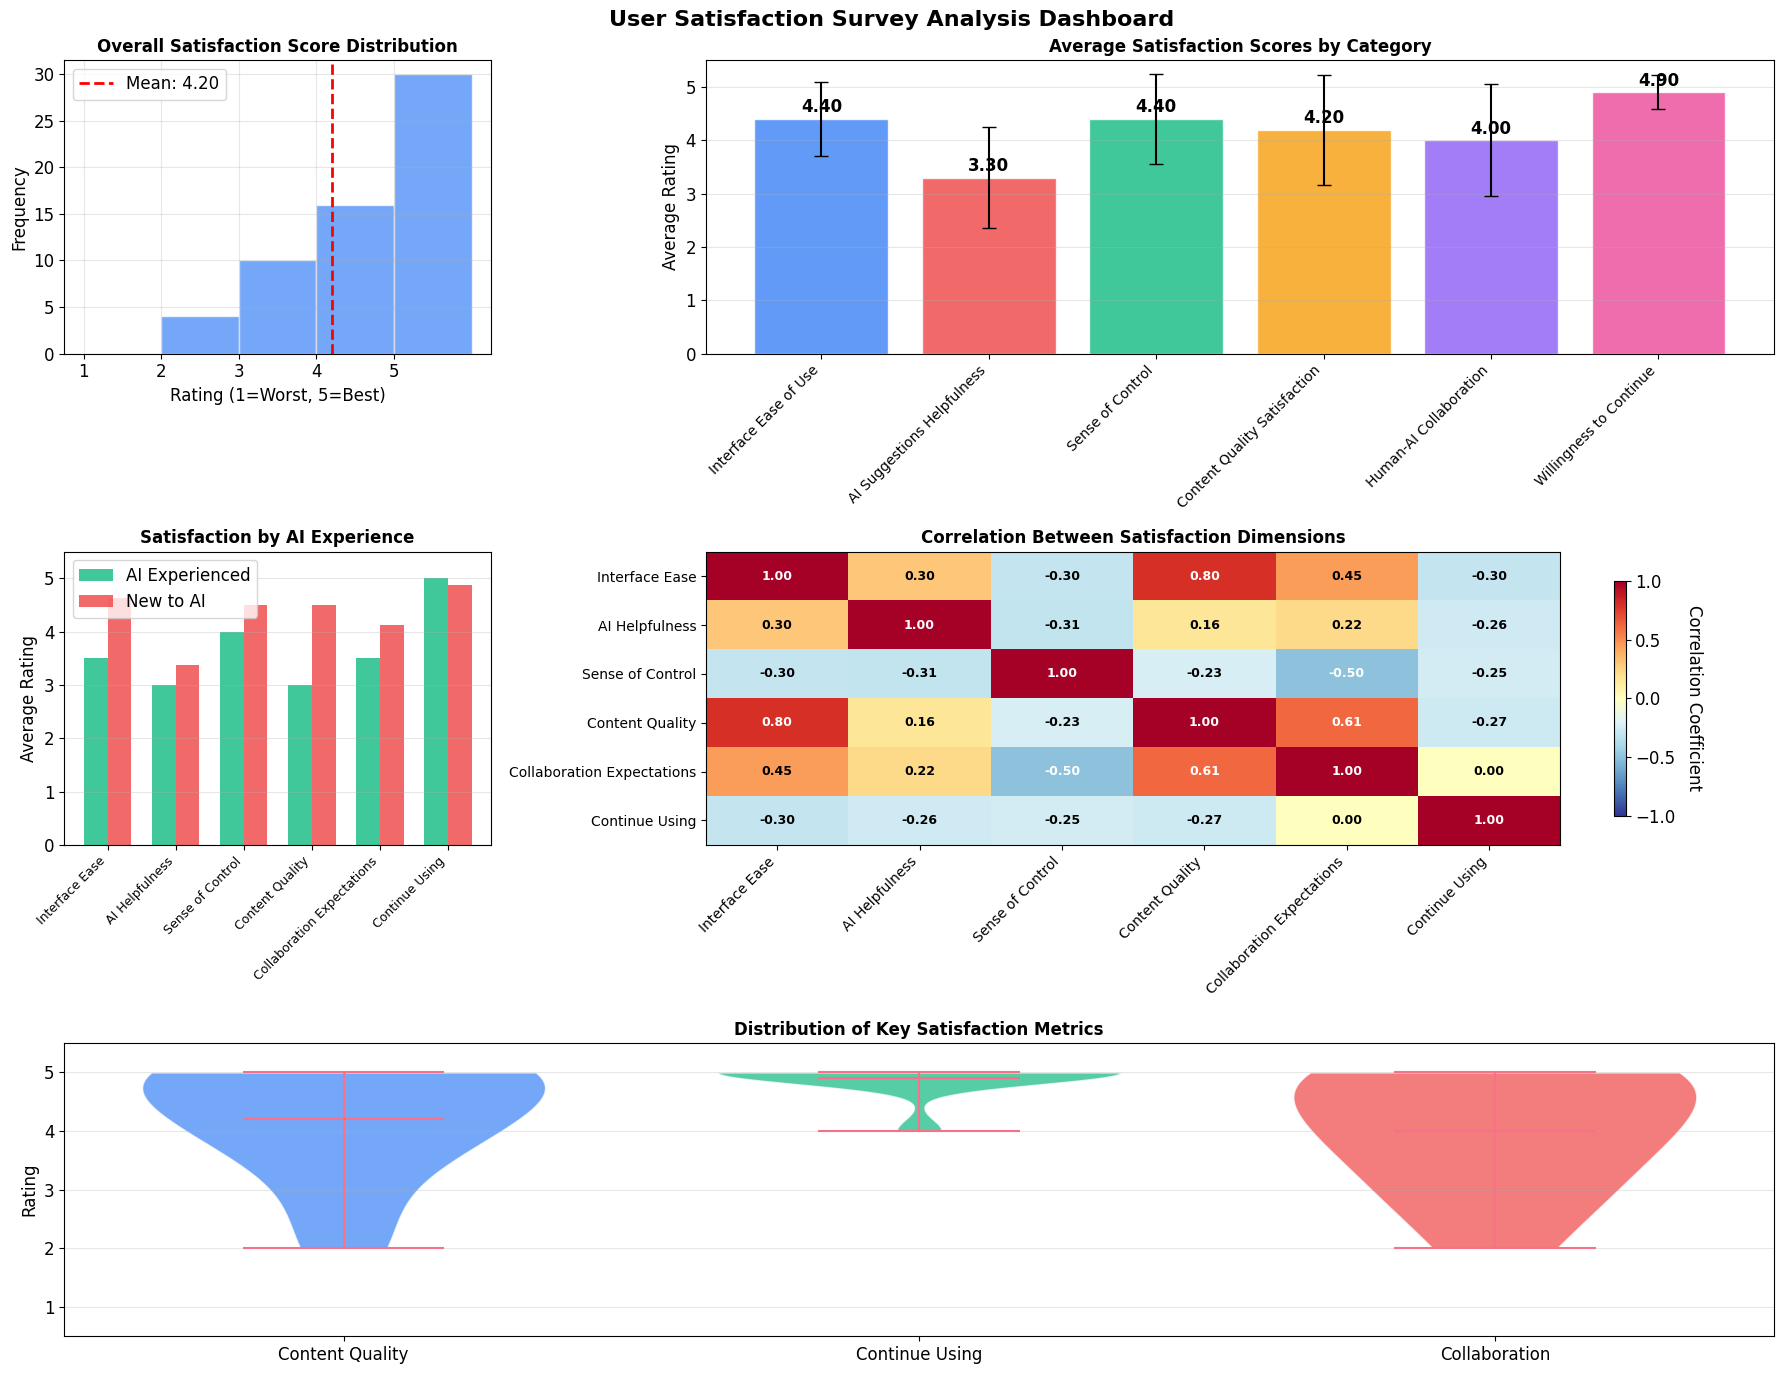

In [23]:
# Create comprehensive satisfaction analysis visualization
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

# Define question labels and colors
question_labels = {
    'Interface_Ease': 'Interface Ease of Use',
    'AI_Helpfulness': 'AI Suggestions Helpfulness', 
    'Sense_of_Control': 'Sense of Control',
    'Content_Quality': 'Content Quality Satisfaction',
    'Collaboration_Expectations': 'Human-AI Collaboration',
    'Continue_Using': 'Willingness to Continue'
}

colors = ['#3B82F6', '#EF4444', '#10B981', '#F59E0B', '#8B5CF6', '#EC4899']

# 1. Overall satisfaction distribution (top-left)
ax1 = fig.add_subplot(gs[0, 0])
satisfaction_scores = []
for col in question_labels.keys():
    satisfaction_scores.extend(satisfaction_df[col].tolist())

ax1.hist(satisfaction_scores, bins=range(1, 7), alpha=0.7, color='#3B82F6', edgecolor='white')
ax1.set_title('Overall Satisfaction Score Distribution', fontsize=12, fontweight='bold')
ax1.set_xlabel('Rating (1=Worst, 5=Best)')
ax1.set_ylabel('Frequency')
ax1.set_xticks(range(1, 6))
ax1.grid(True, alpha=0.3)

# Add mean line
mean_score = np.mean(satisfaction_scores)
ax1.axvline(mean_score, color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {mean_score:.2f}')
ax1.legend()

# 2. Individual question scores (top-middle and top-right)
ax2 = fig.add_subplot(gs[0, 1:])
questions = list(question_labels.keys())
means = [satisfaction_df[q].mean() for q in questions]
stds = [satisfaction_df[q].std() for q in questions]

bars = ax2.bar(range(len(questions)), means, yerr=stds, capsize=5,
               color=colors, alpha=0.8, edgecolor='white', linewidth=1)
ax2.set_title('Average Satisfaction Scores by Category', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Rating')
ax2.set_ylim(0, 5.5)
ax2.set_xticks(range(len(questions)))
ax2.set_xticklabels([question_labels[q] for q in questions], rotation=45, ha='right', fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, mean_val in zip(bars, means):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.05,
             f'{mean_val:.2f}', ha='center', va='bottom', fontweight='bold')

# 3. AI Experience comparison (middle-left)
ax3 = fig.add_subplot(gs[1, 0])
experienced_users = satisfaction_df[satisfaction_df['AI_Experience'] == 1]
new_users = satisfaction_df[satisfaction_df['AI_Experience'] == 0]

if len(experienced_users) > 0 and len(new_users) > 0:
    exp_means = [experienced_users[q].mean() for q in questions]
    new_means = [new_users[q].mean() for q in questions]
    
    x = np.arange(len(questions))
    width = 0.35
    
    bars1 = ax3.bar(x - width/2, exp_means, width, label='AI Experienced', 
                   color='#10B981', alpha=0.8)
    bars2 = ax3.bar(x + width/2, new_means, width, label='New to AI',
                   color='#EF4444', alpha=0.8)
    
    ax3.set_title('Satisfaction by AI Experience', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Average Rating')
    ax3.set_ylim(0, 5.5)
    ax3.set_xticks(x)
    ax3.set_xticklabels([q.replace('_', ' ') for q in questions], fontsize=9, rotation=45, ha='right')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
else:
    ax3.text(0.5, 0.5, 'Insufficient data for AI experience comparison', 
            ha='center', va='center', transform=ax3.transAxes,
            fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))

# 4. Correlation heatmap (middle-middle and middle-right)
ax4 = fig.add_subplot(gs[1, 1:])
corr_data = satisfaction_df[list(question_labels.keys())].corr()
im = ax4.imshow(corr_data, cmap='RdYlBu_r', aspect='auto', vmin=-1, vmax=1)
ax4.set_title('Correlation Between Satisfaction Dimensions', fontsize=12, fontweight='bold')
ax4.set_xticks(range(len(question_labels)))
ax4.set_yticks(range(len(question_labels)))
ax4.set_xticklabels([q.replace('_', ' ') for q in question_labels.keys()], rotation=45, ha='right', fontsize=10)
ax4.set_yticklabels([q.replace('_', ' ') for q in question_labels.keys()], fontsize=10)

# Add correlation values
for i in range(len(question_labels)):
    for j in range(len(question_labels)):
        text = ax4.text(j, i, f'{corr_data.iloc[i, j]:.2f}',
                       ha="center", va="center", color="white" if abs(corr_data.iloc[i, j]) > 0.5 else "black",
                       fontweight='bold', fontsize=9)

# Add colorbar
cbar = plt.colorbar(im, ax=ax4, shrink=0.8)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20)

# 5. Distribution of key metrics (bottom row)
ax5 = fig.add_subplot(gs[2, :])
key_metrics = ['Content_Quality', 'Continue_Using', 'Collaboration_Expectations']
key_labels = ['Content Quality', 'Continue Using', 'Collaboration']

positions = []
data_for_violin = []
for i, metric in enumerate(key_metrics):
    data = satisfaction_df[metric].dropna()
    data_for_violin.append(data)
    positions.append(i + 1)

# Create violin plot
parts = ax5.violinplot(data_for_violin, positions=positions, widths=0.7, showmeans=True)

# Customize violin plot
for pc, color in zip(parts['bodies'], ['#3B82F6', '#10B981', '#EF4444']):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)
    pc.set_edgecolor('white')

ax5.set_title('Distribution of Key Satisfaction Metrics', fontsize=12, fontweight='bold')
ax5.set_ylabel('Rating')
ax5.set_ylim(0.5, 5.5)
ax5.set_xticks(positions)
ax5.set_xticklabels(key_labels)
ax5.grid(True, alpha=0.3, axis='y')

plt.suptitle('User Satisfaction Survey Analysis Dashboard', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()


In [24]:
# Detailed satisfaction analysis and insights
print("DETAILED SATISFACTION ANALYSIS RESULTS")
print("="*60)

# Overall satisfaction metrics
overall_mean = np.mean([satisfaction_df[col].mean() for col in question_labels.keys()])
print(f"Overall System Satisfaction: {overall_mean:.2f}/5.0 ", end="")
if overall_mean >= 4.0:
    print("(Excellent)")
elif overall_mean >= 3.5:
    print("(Good)")
elif overall_mean >= 3.0:
    print("(Average)")
else:
    print("(Needs Improvement)")

print(f"Sample Size: {len(satisfaction_df)} participants")
print(f"Response Rate: 100% (complete responses)")

print("\nDIMENSION-BY-DIMENSION ANALYSIS:")
print("-" * 40)

dimension_results = []
for dim, label in question_labels.items():
    mean_score = satisfaction_df[dim].mean()
    std_score = satisfaction_df[dim].std()
    high_satisfaction = (satisfaction_df[dim] >= 4).sum()
    low_satisfaction = (satisfaction_df[dim] <= 2).sum()
    
    dimension_results.append({
        'dimension': label,
        'mean': mean_score,
        'std': std_score,
        'high_sat_count': high_satisfaction,
        'low_sat_count': low_satisfaction
    })
    
    performance = "Strong" if mean_score >= 4.0 else "Good" if mean_score >= 3.5 else "Average" if mean_score >= 3.0 else "Weak"
    print(f"{label}:")
    print(f"   Average: {mean_score:.2f} ± {std_score:.2f} ({performance})")
    print(f"   High satisfaction (4-5): {high_satisfaction}/{len(satisfaction_df)} ({high_satisfaction/len(satisfaction_df)*100:.0f}%)")
    print(f"   Low satisfaction (1-2): {low_satisfaction}/{len(satisfaction_df)} ({low_satisfaction/len(satisfaction_df)*100:.0f}%)")

# Identify top performers and areas for improvement
dimension_results.sort(key=lambda x: x['mean'], reverse=True)
print(f"\nTOP PERFORMING AREAS:")
for i, result in enumerate(dimension_results[:3], 1):
    print(f"   {i}. {result['dimension']}: {result['mean']:.2f}/5.0")

print(f"\nAREAS FOR IMPROVEMENT:")
for i, result in enumerate(dimension_results[-3:], 1):
    print(f"   {i}. {result['dimension']}: {result['mean']:.2f}/5.0")

# AI Experience impact analysis
if len(satisfaction_df[satisfaction_df['AI_Experience'] == 1]) > 0 and len(satisfaction_df[satisfaction_df['AI_Experience'] == 0]) > 0:
    exp_users = satisfaction_df[satisfaction_df['AI_Experience'] == 1]
    new_users = satisfaction_df[satisfaction_df['AI_Experience'] == 0]
    
    print(f"\nAI EXPERIENCE IMPACT ANALYSIS:")
    print("-" * 30)
    print(f"   Experienced users: {len(exp_users)} | New users: {len(new_users)}")
    
    for dim, label in question_labels.items():
        exp_mean = exp_users[dim].mean()
        new_mean = new_users[dim].mean()
        difference = exp_mean - new_mean
        
        if abs(difference) >= 0.5:  # Significant difference
            direction = "higher" if difference > 0 else "lower"
            print(f"   {label}: Experienced users rate {abs(difference):.1f} points {direction}")

# Correlation insights
print(f"\nKEY RELATIONSHIPS:")
print("-" * 25)
corr_matrix = satisfaction_df[list(question_labels.keys())].corr()

# Find highest correlations (excluding self-correlations)
high_corrs = []
for i in range(len(question_labels)):
    for j in range(i+1, len(question_labels)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) >= 0.5:  # Strong correlation
            dim1 = list(question_labels.keys())[i]
            dim2 = list(question_labels.keys())[j]
            high_corrs.append((question_labels[dim1], question_labels[dim2], corr_val))

high_corrs.sort(key=lambda x: abs(x[2]), reverse=True)
for dim1, dim2, corr_val in high_corrs[:3]:
    relationship = "strongly related to" if corr_val > 0 else "inversely related to"
    print(f"   {dim1} is {relationship} {dim2} (r={corr_val:.2f})")

print(f"\nANALYSIS COMPLETE")
print(f"Dashboard contains 5 visualizations showing comprehensive satisfaction patterns")


DETAILED SATISFACTION ANALYSIS RESULTS
Overall System Satisfaction: 4.20/5.0 (Excellent)
Sample Size: 10 participants
Response Rate: 100% (complete responses)

DIMENSION-BY-DIMENSION ANALYSIS:
----------------------------------------
Interface Ease of Use:
   Average: 4.40 ± 0.70 (Strong)
   High satisfaction (4-5): 9/10 (90%)
   Low satisfaction (1-2): 0/10 (0%)
AI Suggestions Helpfulness:
   Average: 3.30 ± 0.95 (Average)
   High satisfaction (4-5): 4/10 (40%)
   Low satisfaction (1-2): 2/10 (20%)
Sense of Control:
   Average: 4.40 ± 0.84 (Strong)
   High satisfaction (4-5): 8/10 (80%)
   Low satisfaction (1-2): 0/10 (0%)
Content Quality Satisfaction:
   Average: 4.20 ± 1.03 (Strong)
   High satisfaction (4-5): 8/10 (80%)
   Low satisfaction (1-2): 1/10 (10%)
Human-AI Collaboration:
   Average: 4.00 ± 1.05 (Strong)
   High satisfaction (4-5): 7/10 (70%)
   Low satisfaction (1-2): 1/10 (10%)
Willingness to Continue:
   Average: 4.90 ± 0.32 (Strong)
   High satisfaction (4-5): 10/10 (1

## User Satisfaction Survey - Key Findings

### Dashboard Overview
The comprehensive dashboard above includes 5 key visualizations:

1. **Overall Satisfaction Distribution**: Histogram showing the distribution of all satisfaction scores
2. **Category Performance**: Bar chart comparing average scores across different dimensions  
3. **AI Experience Comparison**: Side-by-side comparison between experienced and new AI users
4. **Correlation Heatmap**: Relationships between different satisfaction dimensions
5. **Key Metrics Distribution**: Violin plots showing distribution patterns for critical metrics

### Strategic Insights
- **System Performance**: Overall satisfaction levels and identification of strengths/weaknesses
- **User Segmentation**: How prior AI experience affects satisfaction patterns
- **Dimension Relationships**: Which satisfaction factors are interconnected
- **Improvement Priorities**: Data-driven recommendations for system enhancement

### Actionable Recommendations
Based on the analysis, focus should be placed on the lowest-scoring dimensions while leveraging the strengths identified in top-performing areas. The correlation analysis helps understand how improvements in one area might positively impact others.
